# Analyse de données éducatives pour academy

# Objectifs

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

# Sommaire

**[I Découverte du dataset](#I-Découverte-du-dataset)**\
[I.1 EdStatsData.csv](#I.1-EdStatsData.csv)\
[I.2 EdStatsSeries.csv](#I.2-EdStatsSeries.csv)\
[I.3 EdStatsCountry.csv](#I.3-EdStatsCountry.csv)\
[I.4 EdStatsCountry-Series.csv](#I.4-EdStatsCountry-Series.csv)\
[I.5 EdStatsFootNote.csv](#I.5-EdStatsFootNote.csv)\
**[II Sélection des indicateurs](#II-Sélection-des-indicateurs)**\
**[III Filtre pays/régions](#III-Filtre-pays/régions)**\
**[IV Création des datasets pays/données réelles, pays/prospectives, regions/données réelles, regions/prospectives](#IV-Création-des-datasets-pays/données-réelles,-pays/prospectives,-regions/données-réelles,-regions/prospectives)**\
[IV.0 Restriction du jeu de données aux indicateurs choisis](#IV.0-Restriction-du-jeu-de-données-aux-indicateurs-choisis)\
[IV.1 Données réelles vs données prospectives](#IV.1-Données-réelles-vs-données-prospectives)\
[IV.2 Pays vs régions](#IV.2-Pays-vs-régions)\
[IV.3 Réarrangement des datasets real_data et exportation au format csv](#IV.3-Réarrangement-des-datasets-real_data-et-exportation-au-format-csv)\
[IV.4 prospective data](#IV.4-prospective-data)\
**[V Nettoyage et Analyse des données](#V-Nettoyage-et-Analyse-des-données)**\
[V.1 Chargement des datasets](#V.1-Chargement-des-datasets)\
[V.2 Nettoyage: restriction aux années 2000 à 2016 et sélection des pays](#V.2-Nettoyage:-restriction-aux-années-2000-à-2016-et-sélection-des-pays)\
[V.2.1 Restriction aux années 2000 à 2016](#V.2.1-Restriction-aux-années-2000-à-2016)\
[V.2.2 Restriction aux pays ayant une population de lycéens minimale](#V.2.2-Restriction-aux-pays-ayant-une-population-de-lycéens-minimale)\
[V.2.3 Nettoyage par le taux de remplissage](#V.2.3-Nettoyage-par-le-taux-de-remplissage)\
[V.2.4 Sélection d'indicateurs grâce à leurs corrélations](#V.2.4-Sélection-d'indicateurs-grâce-à-leurs-corrélations)\
**[VI Visualisation et analyse de données](#VI-Visualisation-et-analyse-de-données)**\
[VI.1 Statistiques sur les pays](#VI.1-Statistiques-sur-les-pays)\
[VI.2 Statistiques sur les pays et regions](#VI.2-Statistiques-sur-les-pays-et-regions)\
[VI.3 Scoring](#VI.3-Scoring)

## I Découverte du dataset

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## I.1 EdStatsData.csv

In [2]:
data = pd.read_csv("./EdStats/EdStatsData.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [4]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Beaucoup de NaN en effet! Probablement trompeur, car toutes les années "intéressantes", c'est-à-dire ni trop anciennes, ni prospectives ne sont visibles. Les colonnes 1970 à 2100 ne sont pas entièrement remplies, leur taux de remplissage varie:

In [5]:
cols = data.columns
tr = data[cols[4:-1]].notna().sum()/data.shape[0]
print(f'Taux de remplissage minimum: {tr.min()}')
print(f'Taux de remplissage moyen: {tr.mean()}')
print(f'Taux de remplissage maximum: {tr.max()}')

Taux de remplissage minimum: 0.00016123031129852412
Taux de remplissage moyen: 0.0881554437129286
Taux de remplissage maximum: 0.27334964427857894


On peut même se dire que le tableau est majoritairement composé de NaN. Il nous faudra donc faire beaucoup de nettoyage pour récupérer des infos.

In [6]:
# Doublons ?
data[data.duplicated()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


Non.

Combien y'a-t-il d'"Indicator Codes" différents?

In [7]:
data['Indicator Code'].unique().size

3665

On vérifie qu'il y a autant d'"Indicator Names" différents:

In [8]:
data['Indicator Name'].unique().size

3665

Il y a donc 3665 séries différentes, cacune étant repérée par un code (Indicator Code) et son nom (Indicator Name) Exemples de séries?

In [9]:
data['Indicator Name'].sample(10).to_numpy()

array(['EGRA: Correct Letter Names Read Per Minute (Mean). English. 3rd Grade',
       'Population, age 20, male',
       'Illiterate population, 25-64 years, male (number)',
       'LLECE: Female 6th grade students by science proficiency level (%). Level 2',
       'EGRA: Listening Comprehension - Share of students with a zero score (%). Afan Oromo. 2nd Grade',
       'Barro-Lee: Percentage of population age 50-54 with primary schooling. Completed Primary',
       'Barro-Lee: Average years of tertiary schooling, age 65-69, female',
       'UIS: Net attendance rate, lower secondary, second quintile, gender parity index (GPI)',
       'Barro-Lee: Percentage of female population age 30-34 with no education',
       'Barro-Lee: Average years of total schooling, age 55-59, total'],
      dtype=object)

* Donc, le dataset comporte 70 colonnes - essentiellement les années de 1970 à 2100 - et 886930 lignes au total. Il semble de plus qu'il manque énormément de données, notamment l'année 2017 (seulement 143 non-null sur 886930 au total!). Les données sont au format float64, sauf pour les quatre premières colonnes (format object, ce qui revient ici à des chaînes de caractères).
* Colonnes: Country Name, Country Code, Indicator Name, Indicator Code, puis années de 1970 à 2100, avec des pas variables: 1 colonne/ année entre 1970 et 2017, puis saut à 2020, puis tous les 5 ans jusqu'à 2100: on a affaire à des séries temporelles, avec des données prospectives (surement à partir de 2020, 2020 inclus). 
* La colonne Unnamed: 69 est entièrement vide; il s'agit surement d'un artefact produit lors de la conversion de la table au format csv depuis le site web https://datacatalog.worldbank.org/dataset/education-statistics
* La colonne 'Indicator Name' contient le nom des différentes séries du dataset. Il y en a 3665. 
* Le dataset ne contient pas de doublons a priori

## I.2 EdStatsSeries.csv

In [10]:
df_series = pd.read_csv('EdStats/EdStatsSeries.csv')
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

* La table contient 3665 lignes - très vraisemblablement les 'Indicators' repérés dans la table EdStatsData.csv
* La table contient 21 colonnes en tout, dont seulement 6 sont remplies à plus de 15%. Ces colonnes sont:
    - Series Code
    - Topic
    - Indicator Name
    - Short definition
    - Long definition
    - Source
     
mais en réalité la colonne Short definition est elle-même incomplète. Donc seulement 5 colonnes réellement intéressantes.

In [177]:
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On peut regarder les colonnes intéressantes un peu plus en détail:

In [11]:
df_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [12]:
df_series['Topic'].unique().size

37

La colonne Topic est particulièrement intéressante: elle va nous permettre de filtrer sur les ensembles d'indicateurs qui nous seront utiles par la suite. Par exemple, on peut filtrer par topic pour ne récupérer que les indicateurs voulus:

In [13]:
df_series.loc[df_series['Topic']=='Infrastructure: Communications', 'Indicator Name']

610    Personal computers (per 100 people)
611        Internet users (per 100 people)
Name: Indicator Name, dtype: object

In [14]:
df_series[df_series['Topic']=='Secondary']['Indicator Name'].sample(5)

3496    School life expectancy, secondary, female (years)
3493    School life expectancy, primary and secondary,...
2832    Enrolment in upper secondary education, public...
3518    Survival rate to the last grade of lower secon...
3271    Percentage of enrolment in upper secondary edu...
Name: Indicator Name, dtype: object

Grâce à la colonne 'Long definition', on va pouvoir s'assurer de la pertinence d'un indicateur pour la suite du projet:

In [15]:
print('-'*40)
print('\nIndicator Name: Repetition rate in Grade 1 of lower secondary general education, both sexes (%)\n')
print('Long definition:')
print(df_series[df_series['Indicator Name']==
                'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)']
      ['Long definition'].values)
print('\n'+'-'*40)

----------------------------------------

Indicator Name: Repetition rate in Grade 1 of lower secondary general education, both sexes (%)

Long definition:
['Number of repeaters in a given grade in a given school year, expressed as a percentage of enrolment in that grade the previous school year. Divide the number of repeaters in a given grade in school year t+1 by the number of pupils from the same cohort enrolled in the same grade in the previous school year t.']

----------------------------------------


Finalement, la colonne Source renseigne sur la provenance des données associées à la série considérée - utile si on veut valider la qualité d'une série:

In [16]:
print('-'*40)
print('\nIndicator Name: \'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)\'\n')
print('Source:')
print(df_series[df_series['Indicator Name']==
                'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)']
      ['Source'].values)
print('\n'+'-'*40)

----------------------------------------

Indicator Name: 'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)'

Source:
['UNESCO Institute for Statistics']

----------------------------------------


## I.3 EdStatsCountry.csv

In [17]:
df_country = pd.read_csv('EdStats/EdStatsCountry.csv')

In [18]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [178]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


* La troisième table, intitulée EdStatsCountry.csv, renseigne sur les pays présents dans le dataset EdStatsData.
* Elle contient 241 lignes, c'est-à-dire plus ou moins l'ensemble des pays du monde (du moins ceux pour lesquels on a des données), mais aussi des régions/continent/entités géopolitiques (comme l'UE par exemple). 
* Seules les trois premières colonnes (Country Code, Short Name, Table Name, Long Name) sont totalement remplies
* Dans le cadre de notre analyse, d'autres colonnes semblent intéressantes à première vue:
    - Currency Unit
    - Region
    - Income Group
    - Latest population census
    - Source of most recent Income and expenditure data

## I.4 EdStatsCountry-Series.csv

In [19]:
df_countryseries = pd.read_csv('EdStats/EdStatsCountry-Series.csv')
df_countryseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


* 613 lignes au total, 4 colonnes.
* CountryCode, SeriesCode, DESCRIPTION: Cette table renseigne la source de certaines séries.

In [20]:
df_countryseries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [21]:
df_countryseries.CountryCode.unique().size

211

Seulement 211 pays. Donc certains pays/régions de la table EdStatsCountry ne se trouvent pas dans cette table. Probablement les régions/continents etc. n'y figurent pas? 

In [22]:
df_country[~df_country['Country Code'].isin(df_countryseries.CountryCode.unique())]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,CUW,Curaçao,Curaçao,Curaçao,CW,Netherlands Antilles guilder,NaN,Latin America & Caribbean,High income: nonOECD,CW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il semblerait que ce soit en effet le cas. Qu'en est-il des séries? 

In [23]:
df_countryseries.SeriesCode.unique().size

21

Seulement 21 séries représentées. Qu'ont-elles de particulier?

In [24]:
df_series[df_series['Series Code'].isin(df_countryseries.SeriesCode)]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1660,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,NY.GDP.MKTP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (constant 2011 international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,2011,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2010 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,2010,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,2011,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1667,NY.GNP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI, PPP (current international $)",NaN,PPP GNI (formerly PPP GNP) is gross national i...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,NY.GNP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",NaN,GNI per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2401,SP.POP.0014.FE.IN,Health: Population: Structure,"Population ages 0-14, female",NaN,Female population between the ages 0 to 14. Po...,NaN,Annual,NaN,NaN,Sum,...,NaN,Relevance to gender indicator: Knowing how man...,World Bank staff estimates using the World Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Elles appartiennent toutes à ces topics:

In [25]:
print('-'*40)
print('Topics représentés:')
print(df_series[df_series['Series Code'].isin(df_countryseries.SeriesCode)]['Topic'].unique())
print('-'*40)

----------------------------------------
Topics représentés:
['Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Health: Population: Structure' 'Health: Population: Dynamics']
----------------------------------------


## I.5 EdStatsFootNote.csv

In [26]:
df_footnote = pd.read_csv('EdStats/EdStatsFootNote.csv')
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


* Table sensiblement plus grosse: 643638 lignes, 5 colonnes
* CountryCode, SeriesCode, Year, DESCRIPTION: toutes entièrement renseignées. 

In [27]:
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Petit tour rapide: quels sont les pays représentés? Les séries? Les années?

In [28]:
df_footnote.CountryCode.unique().size

239

Quels sont les pays qui n'apparaissent pas dans cette table?

In [29]:
df_country[~df_country['Country Code'].isin(df_footnote.CountryCode.unique())]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
85,GRL,Greenland,Greenland,Greenland,GL,Danish krone,NaN,Europe & Central Asia,High income: nonOECD,GL,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
134,MAF,St. Martin (French part),St. Martin (French part),St. Martin (French part),MF,Euro,NaN,Latin America & Caribbean,High income: nonOECD,MF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,SXM,Sint Maarten (Dutch part),Sint Maarten (Dutch part),Sint Maarten (Dutch part),SX,Netherlands Antilles guilder,NaN,Latin America & Caribbean,High income: nonOECD,SX,...,NaN,2011,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


Du coup il y doit y avoir un pays de la table FootNote qui n'apparaît pas dans Country...?

In [30]:
df_footnote[~df_footnote.CountryCode.isin(df_country['Country Code'].unique())]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
622862,VGB,SE.SEC.TCHR,YR1990,UIS Estimation,NaN
622863,VGB,SE.SEC.TCHR.FE,YR1990,UIS Estimation,NaN
622864,VGB,SE.SEC.TCHR.FE.ZS,YR1990,UIS Estimation,NaN
622865,VGB,SE.PRM.NENR.MA,YR2005,UIS estimation.,NaN
622866,VGB,SE.TER.GRAD.SV.ZS,YR2002,Country estimation.,NaN
...,...,...,...,...,...
623848,VGB,SE.TER.TCHR.FE.ZS,YR2002,Country estimation.,NaN
623849,VGB,SE.TER.TCHR.FE.ZS,YR2004,Country estimation.,NaN
623850,VGB,SE.XPD.PRIM.ZS,YR2005,Country estimation.,NaN
623851,VGB,SE.XPD.SECO.ZS,YR2006,Country estimation.,NaN


Trouvé! C'est le pays VGB. Peut-on en savoir un peu plus, par exemple grâce à la table EdStatsCountry-Series?

In [31]:
df_countryseries[df_countryseries.CountryCode=='VGB']

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3


Ce pays ne semble pas appraître dans cette table non plus...

In [32]:
df_footnote.SeriesCode.unique().size

1558

Seules certaines "series" apparaissent dans cette table. Ont-elles quelque chose de particulier?

In [33]:
df_series[df_series['Series Code'].isin(df_footnote.SeriesCode.unique())]['Topic'].unique()

array(['Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Literacy', 'Background', 'Primary',
       'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures', 'Health: Risk factors',
       'Health: Mortality', 'Social Protection & Labor: Unemployment',
       'Health: Population: Structure', 'Population',
       'Health: Population: Dynamics', 'EMIS',
       'Post-Secondary/Non-Tertiary', 'Attainment'], dtype=object)

In [34]:
df_series[df_series['Series Code'].isin(df_footnote.SeriesCode.unique())]['Topic'].unique().size

28

Ok, 28 < 37 (37 = nombre de 'Topic' différents dans la table EdStatsSeries). Quels sont les 'Topic' non représentés ici?

In [35]:
topics = df_series[df_series['Series Code'].isin(df_footnote.SeriesCode.unique())]['Topic'].unique()

In [36]:
print('-'*40)
print('Topics absents de la table EdStatsFootNote:\n')
print(df_series[~df_series.Topic.isin(topics)]['Topic'].unique())
print('-'*40)

----------------------------------------
Topics absents de la table EdStatsFootNote:

['Education Equality' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Tertiary Education (SABER)' 'Workforce Development (SABER)'
 'Social Protection & Labor: Labor force structure' 'Laber']
----------------------------------------


Les tables EdStatsCountrySeries et EdStatsFootNote donnent des informations sur certains pays, certains indicateurs, certains 'topic'. Donc pas très utile pour nous, dans un premier temps.

# II Sélection des indicateurs

Les indicateurs sont regroupés par "Topics": cela va nous aider à sélectionner des indicaterus pertinents. On va donc parcourir les différents topics, et si le topic semble intéressant, sélectionner quelques indicateurs.

**Topic 'Attainment'**

In [37]:
df_series.loc[df_series['Topic']=='Attainment', 'Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       'Barro-Lee: Percentage of population age 15+ with no education',
       'Barro-Lee: Percentage of female population age 20-24 with no education',
       'Barro-Lee: Percentage of population age 20-24 with no education',
       'Barro-Lee: Percentage of female population age 25-29 with no education',
       'Barro-Lee: Percentage of population age 25-29 with no education',
       'Barro-Lee: Percentage of female population age 25+ with no education',
       'Barro-Lee: Percentage of population age 25+ with no education',
       'Barro-Lee: Percentage of female population age 30-34 with no education',
       'Barro-Lee: Percentage of population age 30-34 with no education',
       'Barro-Lee: Percentage of female population age 35-39 with no education

In [38]:
attainment = df_series[df_series['Indicator Name'].isin(['Barro-Lee: Percentage of population age 15-19 with no education',
'Barro-Lee: Percentage of population age 20-24 with no education',
'Barro-Lee: Percentage of population age 25-29 with no education'])][['Series Code', 'Topic','Indicator Name']]

In [39]:
attainment.to_csv('attainment.csv', index_label=False)

**topic 'Education Equality'**

In [40]:
df_series[df_series['Topic']=='Education Equality']['Indicator Name'].unique()

array(['DHS: Gross attendance rate. Post Secondary',
       'DHS: Gross attendance rate. Post Secondary. Female',
       'DHS: Gross attendance rate. Post Secondary. Male',
       'DHS: Gross attendance rate. Post Secondary. Quintile 1',
       'DHS: Gross attendance rate. Post Secondary. Quintile 2',
       'DHS: Gross attendance rate. Post Secondary. Quintile 3',
       'DHS: Gross attendance rate. Post Secondary. Quintile 4',
       'DHS: Gross attendance rate. Post Secondary. Quintile 5',
       'DHS: Gross attendance rate. Post Secondary. Rural',
       'DHS: Gross attendance rate. Post Secondary. Urban',
       'DHS: Net attendance rate. Primary',
       'DHS: Net attendance rate. Primary. Female',
       'DHS: Net attendance rate. Primary. Male',
       'DHS: Net attendance rate. Primary. Quintile 1',
       'DHS: Net attendance rate. Primary. Quintile 2',
       'DHS: Net attendance rate. Primary. Quintile 3',
       'DHS: Net attendance rate. Primary. Quintile 4',
       'DHS:

In [41]:
# On va avoir besoin de regarder les définitions de ces indicateurs pour connaître leur pertinence

def get_definition(table, indicator):
    long_definition = table[table['Indicator Name']==indicator]['Long definition'].values
    return long_definition

def get_SeriesCode(table, indicator):
    series_code = table[table['Indicator Name']==indicator]['Series Code'].values
    return series_code

# Par exemple, 'DHS: Net attendance rate. Secondary'
print(get_definition(df_series, 'DHS: Net attendance rate. Secondary'))
print(get_SeriesCode(df_series, 'DHS: Net attendance rate. Secondary'))

['Net attendance rate. Secondary is the proportion of children of official secondary school age who are attending secondary school.']
['HH.DHS.NAR.23']


In [42]:
get_definition(df_series, 'DHS: Secondary completion rate')

array(['Secondary completion rate is the total number of students of any age in last grade of secondary school, minus the number of repeaters in that grade, divided by the number of children of official graduation age. The completion rate can exceed 100 percent if there are many overage students in the last grade of secondary school.'],
      dtype=object)

In [43]:
print(get_definition(df_series, 'MICS: Net attendance rate. Secondary'))
print(get_SeriesCode(df_series, 'MICS: Net attendance rate. Secondary'))

['Net attendance rate. Secondary is the proportion of children of official secondary school age who are attending secondary school.']
['HH.MICS.NAR.23']


In [44]:
get_definition(df_series, 'UIS: Adjusted net attendance rate, primary, both sexes (%)')

array(['Total number of students of the official primary school age group who attended primary or secondary education at any time during the reference academic year, expressed as a percentage of the corresponding population. The UNESCO Institute for Statistics (UIS) calculates household survey-based education indicators using data from Demographic and Health Surveys (DHS) and Multiple Indicator Cluster Surveys (MICS). School participation in household surveys and censuses is commonly measured by whether pupils or students attended a given grade or level of education at least one day during the academic reference year. Therefore, indicators of school participation derived from household survey data refer to attendance, e.g. “net attendance rate” or “adjusted net attendance rate”. The comparable indicator for administrative data is "Adjusted net enrolment rate, primary" because the data is based on numbers of students officially enrolled in educational institutions in the stated year. Fo

Info importante: cet indicateur peut-être utilisé avec l'autre indicator "Adjusted net enrolment rate, primary". De plus, cet indicateur est basé sur DHS et MICS, mais malheureusement aucune donnée concernant upper secondary. donc on va prendre les indicateurs DHS et MICS.

In [45]:
get_definition(df_series, 'DHS: Gross attendance rate. Post Secondary')

array(['Gross attendance rate. Post Secondary is the number of post-secondary school pupils of any age, expressed as a percentage of youth of post-secondary school age. Post-secondary school age is defined as the age range from graduation from secondary school till the maximum age set as a parameter of the educational system.'],
      dtype=object)

In [46]:
education_equality = df_series.loc[df_series['Indicator Name'].isin(['MICS: Net attendance rate. Secondary',
                            'DHS: Net attendance rate. Secondary']), ['Series Code', 'Topic','Indicator Name']]

En réalité, ces indicateurs constitue un doublon avec les indicateurs contenus dans les topics secondary et tertiary. On ne les retiendra donc pas.

**topic 'Learning Outcomes'**

In [47]:
df_series[df_series['Topic']=='Learning Outcomes']['Indicator Name'].sample(50)

645     EGRA: Correct Letter Sounds Read Per Minute (M...
1053    LLECE: Male 6th grade students by mathematics ...
1458    PISA: 15-year-olds by reading proficiency leve...
937     EGRA: Reading Comprehension - Share of student...
767     EGRA: Listening Comprehension - Share of stude...
827     EGRA: Correct Non-Words Read Per Minute (Mean)...
788     EGRA: Listening Comprehension - Share of stude...
698     EGRA: Oral Reading Fluency - Share of students...
1032    LLECE: Mean performance on the mathematics sca...
1399    PIRLS: Distribution of Reading Scores: 10th Pe...
849     EGRA: Correct Non-Words Read Per Minute (Mean)...
1048    LLECE: 6th grade students by mathematics profi...
728     EGRA: Oral Reading Fluency - Share of students...
1029    LLECE: Female 3rd grade students by mathematic...
1511    SACMEQ: Male 6th grade students by mathematics...
1479    PISA: Male 15-year-olds by science proficiency...
1174    PASEC: Distribution of 2nd grade mathematics s...
1503    PISA: 

Peut-être pas les indicateurs à utiliser en priorité...

**topics 'Economic Policy & Debt'**

In [48]:
economic_indicators = df_series[df_series['Topic'].apply(lambda x: x.count('Economic Policy & Debt') > 0)]['Indicator Name'].unique()

In [242]:
print(economic_indicators)

['GDP (current US$)' 'GDP (constant 2010 US$)'
 'GDP, PPP (current international $)'
 'GDP, PPP (constant 2011 international $)' 'GDP per capita (current US$)'
 'GDP per capita (constant 2010 US$)'
 'GDP per capita, PPP (current international $)'
 'GDP per capita, PPP (constant 2011 international $)' 'GNI (current US$)'
 'GNI, PPP (current international $)'
 'GNI per capita, Atlas method (current US$)'
 'GNI per capita, PPP (current international $)']


On a donc affaire à des indicateurs purement macro-économiques. Intéressant pour pouvoir avoir une idée de la richesse - ou niveau de développement, même si ce n'est pas exactement la même chose - des différents pays

In [243]:
print(get_definition(df_series, 'GNI (current US$)'))

['GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.']


Le GNI correspond au PNB français. C'est une mesure moins utilisée, et moins intuitive. On l'écarte donc.

Le GDP per capita, PPP permet de comparer les pays par la richesse moyenne individelle. Les autres indicateurs ne vont pas nous apporter un surplus d'information réellement utile ici, donc on ne garde que cet indicateur

In [51]:
economic_series = df_series.loc[df_series['Indicator Name'].isin(['GDP per capita, PPP (constant 2011 international $)']), ['Series Code', 'Indicator Name']].to_numpy()

In [52]:
economic = df_series.loc[df_series['Indicator Name'].isin(['GDP per capita, PPP (constant 2011 international $)']), 
                     ['Series Code', 'Topic', 'Indicator Name']]

Regardons maintenant si il y a des données intéressantes concernant les enseignants

In [53]:
df_series[df_series['Topic'].isin(['Teachers', 'Teachers (SABER)'])]['Indicator Name'].unique()

array(['Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Starting salary',
       'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. 10 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. 15 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Top of scale',
       'Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary',
       'Annual statutory teacher salaries in public institutions in USD. Primary. 10 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Primary. 15 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Primary. Top of scale',
       'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary',
       'Annual statutory teacher salaries in public in

Ne semble pas très pertinent à première vue

In [54]:
df_series[df_series['Topic']=='Education Management Information Systems (SABER)']['Indicator Name'].unique()

array(['SABER: (Education Management Information Systems) Policy Goal 1: Enabling Environment',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 1: Legal Framework',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 2: Organizational Structure',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 3: Human Resources',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 4: Infrastructural capacity',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 5: Budget',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 6: Data-driven Culture',
       'SABER: (Education Management Information Systems) Policy Goal 2: System Soundness',
       'SABER: (Education Management Information Systems) Policy Goal 2 Lever 1: Data Architecture',
       'SABER: (Education Management Information Systems) Policy Goal 2 Lever 2: Data Coverage',
       

Après vérification, le topic 'Education Management Information Systems (SABER)' correspond en fait à 'the improvement of EMIS systems and their further usage for policymaking.'

topic 'Early Child Development' pas intéressant a priori. Topic suivant: 'Engaging the Private Sector (SABER)'

In [55]:
df_series[df_series['Topic']=='Engaging the Private Sector (SABER)']['Indicator Name'].unique()

array(['SABER: (Engaging the Private Sector, Government funded) Policy Goal 5: Encouraging innovation by providers',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 1: Teacher standards',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 2: Appointment and deployment of teachers',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 3: Teacher salaries',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 4: Teacher dismissal',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 5: Curriculum delivery',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 6: Classroom resourcing',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 7: Budget autonomy',
       'SABER: (Engaging the Private Sector, Government funded) Policy Goal 6: Holding schools accountable',
  

Meme chose que précédemment, ces indicateurs ne nous seront pas d'une grande utilité - en tout cas pas dans un premier temps.

In [56]:
# Topic 'Tertiary Education (SABER)'
df_series[df_series['Topic']=='Tertiary Education (SABER)']['Indicator Name'].unique()

array(['SABER: (Tertiary Education) Policy Goal 1: Vision for Tertiary Education',
       'SABER: (Tertiary Education) Policy Goal 1 Lever 1: Clear vision',
       'SABER: (Tertiary Education) Policy Goal 2: Regulatory Framework for Tertiary Education',
       'SABER: (Tertiary Education) Policy Goal 2 Lever 1: Steering the system',
       'SABER: (Tertiary Education) Policy Goal 3: Governance',
       'SABER: (Tertiary Education) Policy Goal 3 Lever 1: Articulation',
       'SABER: (Tertiary Education) Policy Goal 3 Lever 2: Institutional autonomy',
       'SABER: (Tertiary Education) Policy Goal 4: Finance',
       'SABER: (Tertiary Education) Policy Goal 4 Lever 1: Coverage of resource allocation',
       'SABER: (Tertiary Education) Policy Goal 4 Lever 2: Resource allocation',
       'SABER: (Tertiary Education) Policy Goal 4 Lever 3: Resource utilization (Equity)',
       'SABER: (Tertiary Education) Policy Goal 5: Quality Assurance',
       'SABER: (Tertiary Education) Policy Goa

**topic 'Literacy'**

In [57]:
df_series[df_series['Topic']=='Literacy']['Indicator Name'].unique()

array(['Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)',
       'Youth literacy rate, population 15-24 years, both sexes (%)',
       'Adult literacy rate, population 15+ years, female (%)',
       'Adult literacy rate, population 15+ years, male (%)',
       'Adult literacy rate, population 15+ years, both sexes (%)',
       'Illiterate population, 25-64 years, both sexes (number)',
       'Illiterate population, 25-64 years, female (number)',
       'Illiterate population, 25-64 years, male (number)',
       'Illiterate population, 25-64 years, % female',
       'Youth illiterate population, 15-24 years, both sexes (number)',
       'Youth illiterate population, 15-24 years, female (number)',
       'Youth illiterate population, 15-24 years, male (number)',
       'Adult illiterate population, 15+ years, both sexes (number)',
      

In [58]:
get_definition(df_series, 'Youth literacy rate, population 15-24 years, both sexes (%)')

array(['Number of people age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.'],
      dtype=object)

In [59]:
get_definition(df_series, 'Adult literacy rate, population 15+ years, both sexes (%)')

array(['Percentage of the population age 15 and above who can, with understanding, read and write a short, simple statement on their everyday life. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. This indicator is calculated by dividing the number of literates aged 15 years and over by the corresponding age group population and multiplying the result by 100.'],
      dtype=object)

In [60]:
literacy_series = df_series.loc[df_series['Indicator Name'].isin(['Adult literacy rate, population 15+ years, both sexes (%)']), ['Series Code', 'Indicator Name']].to_numpy()

In [61]:
literacy = df_series.loc[df_series['Indicator Name'].isin(['Adult literacy rate, population 15+ years, both sexes (%)']), ['Series Code', 'Topic', 'Indicator Name']]

On choisit l'indicateur 'Adult literacy rate' car il permet d'englober une donnée intéressante pour nous: la proportion de personnes illettrées en âge d'aller au lycée ou à l'université est-elle importante ou non?

In [62]:
# Topic 'Background'
df_series[df_series['Topic']=='Background']['Indicator Name'].unique()

array(['Duration of compulsory education (years)',
       'Official entrance age to compulsory education (years)'],
      dtype=object)

**Topics 'secondary' et 'tertiary':**

In [63]:
df_series[df_series['Topic'].isin(['Secondary'])]['Indicator Name'].unique()

array(['Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
       'Gross enrolment ratio, secondary, gender parity index (GPI)',
       'Official entrance age to lower secondary education (years)',
       'Lower secondary completion rate, female (%)',
       'Lower secondary completion rate, male (%)',
       'Lower secondary completion rate, both sexes (%)',
       'Theoretical duration of secondary education (years)',
       'Theoretical duration of lower secondary education (years)',
       'Theoretical duration of upper secondary education (years)',
       'Enrolment in secondary education, both sexes (number)',
       'Enrolment in secondary education, female (number)',
       'Percentage of female students in secondary education enrolled in vocational programmes, female (%)',
       'Percentage of students in secondary education who are female (%)',
       'Enrolment in secondary general, both sexes (number)',
       'Enrolment in secondary general, female 

In [64]:
get_definition(df_series, 'Enrolment in lower secondary education, both sexes (number)')

array(['Total number of students enrolled in public and private lower secondary education institutions regardless of age.'],
      dtype=object)

Ce n'est pas ce qu'on cherche...

In [65]:
get_definition(df_series, 'Enrolment in secondary education, both sexes (number)')

array(['Total number of students enrolled at public and private secondary education institutions regardless of age.'],
      dtype=object)

Mieux!

In [66]:
get_definition(df_series, 'Net enrolment rate, secondary, both sexes (%)')

array(['Total number of students in the theoretical age group for secondary education enrolled in that level, expressed as a percentage of the total population in that age group. Divide the number of students enrolled who are of the official age group for secondary education by the population for the same age group and multiply the result by 100. NER at each level of education should be based on enrolment of the relevant age group in all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes.'],
      dtype=object)

Ne semble pas particulièrement pertinent.

In [67]:
get_definition(df_series, 'Gross enrolment ratio, upper secondary, both sexes (%)')

array(['Total enrollment in upper secondary education, regardless of age, expressed as a percentage of the total population of official upper secondary education age.'],
      dtype=object)

Ok! Faisons un tour de toutes les définitions

In [68]:
secondary_series = df_series[df_series['Topic'].isin(['Secondary'])]['Indicator Name'].unique()

In [69]:
df_series[df_series['Indicator Name'].isin(secondary_series)][['Indicator Name', 'Long definition']].to_numpy()

array([['Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
        'Ratio of female gross enrolment ratio for primary and secondary to male gross enrolment ratio for primary and secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.'],
       ['Gross enrolment ratio, secondary, gender parity index (GPI)',
        'Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.'],
    

In [70]:
secondary = df_series.loc[df_series['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)',
'Enrolment in lower secondary education, both sexes (number)',
'Enrolment in upper secondary education, both sexes (number)']), ['Series Code', 'Topic', 'Indicator Name']]

In [71]:
tertiary_series = df_series[df_series['Topic'].isin(['Tertiary'])]['Indicator Name'].unique()

Petit tour des définitions des différents indicateurs

In [72]:
df_series[df_series['Indicator Name'].isin(tertiary_series)][['Indicator Name', 'Long definition']].to_numpy()

array([['Gross enrolment ratio, tertiary, gender parity index (GPI)',
        'Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.'],
       ['School life expectancy, primary to tertiary, both sexes (years)',
        'Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the dur

In [73]:
tertiary = df_series.loc[df_series['Indicator Name'].isin([
    'Enrolment in tertiary education, all programmes, both sexes (number)'
]), ['Series Code', 'Topic', 'Indicator Name']]

**Topic 'Infrastructure: Communications'**

In [74]:
df_series[df_series['Topic']=='Infrastructure: Communications']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, séries potentiellement intéressantes

In [75]:
infrastructure = df_series[df_series['Topic']=='Infrastructure: Communications'][['Series Code', 'Topic', 'Indicator Name']]

**topic 'Expenditures'**

In [76]:
exp_series = df_series[df_series['Topic']=='Expenditures']['Indicator Name'].unique()

In [77]:
exp_series

array(['Current expenditure as % of total expenditure in public institutions (%)',
       'Government expenditure per primary student as % of GDP per capita (%)',
       'Expenditure on primary as % of government expenditure on education (%)',
       'Government expenditure per secondary student as % of GDP per capita (%)',
       'Expenditure on secondary as % of government expenditure on education (%)',
       'Government expenditure per tertiary student as % of GDP per capita (%)',
       'Expenditure on tertiary as % of government expenditure on education (%)',
       'Expenditure on education as % of total government expenditure (%)',
       'Government expenditure on education as % of GDP (%)',
       'Government expenditure on pre-primary education as % of GDP (%)',
       'Government expenditure in pre-primary institutions as % of GDP (%)',
       'Government expenditure on primary education as % of GDP (%)',
       'Government expenditure in primary institutions as % of GDP (%

In [78]:
get_definition(df_series, 'Government expenditure on secondary education as % of GDP (%)')

array(['Total general (local, regional and central) government expenditure on secondary education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. Divide total government expenditure for a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/'],
      dtype=object)

In [79]:
get_definition(df_series, 'Government expenditure per secondary student (constant PPP$)')

array(['Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in purchasing power parity (PPP) dollars at constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/'],
      dtype=object)

Peut être un indicateur intéressant. A voir si la data suit

In [80]:
get_definition(df_series, 'Government expenditure per upper secondary student (PPP$)')

array(['Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal purchasing power parity (PPP) dollars. Divide total government expenditure (in PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/'],
      dtype=object)

Regardons les autres définitions

In [81]:
df_series[df_series['Indicator Name'].isin(exp_series)][['Indicator Name', 'Long definition']].to_numpy()

array([['Current expenditure as % of total expenditure in public institutions (%)',
        'Current expenditure expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional). Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure is consumed within the current year and would have to be renewed if needed in the following year. It includes staff compensation and current expenditure other than for staff compensation (ex. on teaching materials, ancillary services and administration). Divide all current expenditure in public institutions by total expenditure (current and capital) in public institutions, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/'],
       ['Government expenditure per primary student as % of GDP per capita (%)',
        'Average total (current, capital and transfers) general gover

In [82]:
expenditures = df_series.loc[df_series['Indicator Name'].isin([
    'Government expenditure per upper secondary student (PPP$)',
    'Government expenditure per tertiary student (PPP$)',
    'Expenditure on upper secondary as % of government expenditure on education (%)',
    'Expenditure on tertiary as % of government expenditure on education (%)'
]), ['Series Code', 'Topic', 'Indicator Name']]

**Topics 'Health: Population: Structure', 'Population', 'Health: Population: Dynamics'**

In [83]:
df_series[df_series['Topic'].isin(['Health: Population: Structure', 'Population', 'Health: Population: Dynamics'])]['Indicator Name'].to_numpy()

array(['Population ages 0-14, female', 'Population ages 0-14, male',
       'Population ages 0-14, total', 'Population ages 0-14 (% of total)',
       'Population, ages 3-5, female', 'Population, ages 3-5, male',
       'Population, ages 3-5, total', 'Population, ages 4-6, female',
       'Population, ages 4-6, male', 'Population, ages 4-6, total',
       'Population, ages 5-9, female', 'Population, ages 5-9, male',
       'Population, ages 5-9, total', 'Population, ages 5-10, female',
       'Population, ages 5-10, male', 'Population, ages 5-10, total',
       'Population, ages 5-11, female', 'Population, ages 5-11, male',
       'Population, ages 5-11, total', 'Population, ages 6-9, female',
       'Population, ages 6-9, male', 'Population, ages 6-9, total',
       'Population, ages 6-10, female', 'Population, ages 6-10, male',
       'Population, ages 6-10, total', 'Population, ages 6-11, female',
       'Population, ages 6-11, male', 'Population, ages 6-11, total',
       'Populati

In [84]:
# Séries potentiellement intéressantes
pop_series = df_series[df_series['Indicator Name'].isin(['Population of the official age for lower secondary education, both sexes (number)',
                                                            'Population of the official age for upper secondary education, both sexes (number)',
                                                            'Population of the official age for tertiary education, both sexes (number)',
                                                           ])][['Series Code', 'Indicator Name']].to_numpy()

In [85]:
# Exportation csv
population = df_series.loc[df_series['Indicator Name'].isin([
    'Population of the official age for lower secondary education, both sexes (number)',
    'Population of the official age for upper secondary education, both sexes (number)',
    'Population of the official age for tertiary education, both sexes (number)'
]), ['Series Code', 'Topic', 'Indicator Name']]

Peut être intéressant de croiser différentes données de population pour savoir si un pays va voir sa population de lycéens ou d'étudiants augmenter dans les prochaines années

Beaucoup de données relatives au nombre d'étudiants admis à différents niveaux - peut être utile, par exemple si le nombre d'étudiant augmente d'année en année, c'est un marché qui croît... Au niveau des indicateurs, on a donc a priori:
- nombre d'ordinateurs / 100 pers
- utilisation d'internet/100 pers
- données liées au financement de l'éducation secondaire
- données liées au financement de l'éducation supérieure
- données liées à la démographie du secondaire
- données liées à la démographie de l'éducation supérieure

On va créer des tables regroupant ces divers indicateurs

In [86]:
# On rassembles les séries potentiellement intéressantes secondary et tertiary
enrolment = pd.concat([secondary, tertiary])

Regroupons tous ces indicateurs dans une seule table

In [87]:
indicateurs = pd.concat([enrolment, economic, expenditures, 
                         infrastructure, literacy, population])

In [88]:
indicateurs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2294 to 2614
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Code     15 non-null     object
 1   Topic           15 non-null     object
 2   Indicator Name  15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


In [244]:
print(indicateurs['Indicator Name'].values)

['Enrolment in secondary education, both sexes (number)'
 'Enrolment in lower secondary education, both sexes (number)'
 'Enrolment in upper secondary education, both sexes (number)'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'GDP per capita, PPP (constant 2011 international $)'
 'Expenditure on tertiary as % of government expenditure on education (%)'
 'Expenditure on upper secondary as % of government expenditure on education (%)'
 'Government expenditure per upper secondary student (PPP$)'
 'Government expenditure per tertiary student (PPP$)'
 'Personal computers (per 100 people)' 'Internet users (per 100 people)'
 'Adult literacy rate, population 15+ years, both sexes (%)'
 'Population of the official age for lower secondary education, both sexes (number)'
 'Population of the official age for upper secondary education, both sexes (number)'
 'Population of the official age for tertiary education, both sexes (number)']


In [90]:
# Exportation csv
indicateurs.to_csv('indicateurs.csv', index_label=False)

In [91]:
# Combien d'indicateurs présélectionnés ?
indicateurs.shape

(15, 3)

# III Filtre pays/régions

On va réaliser un premier partage de la base de données en deux ensembles:
- un ensemble contenant uniquement les pays
- un ensemble contenant les régions/continents/entités géopolitiques

In [92]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [93]:
# colonne Region?
df_country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Regardons par exemple quels sont les pays associés à la région 'Europe & Central Asia'

In [94]:
df_country[df_country.Region=='Europe & Central Asia']['Short Name']

3                     Albania
4                     Andorra
8                     Armenia
12                    Austria
13                 Azerbaijan
15                    Belgium
19                   Bulgaria
22     Bosnia and Herzegovina
23                    Belarus
34                Switzerland
35            Channel Islands
49                     Cyprus
50             Czech Republic
51                    Germany
54                    Denmark
65                      Spain
66                    Estonia
69                    Finland
71                     France
72             Faeroe Islands
75             United Kingdom
76                    Georgia
83                     Greece
85                  Greenland
93                    Croatia
95                    Hungary
97                Isle of Man
99                    Ireland
102                   Iceland
104                     Italy
108                Kazakhstan
110           Kyrgyz Republic
125             Liechtenstein
130       

In [95]:
df_country[df_country['Region'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,...,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Etonnament, Gibraltar n'est associé à aucun région! On va remédier à cela en utilisant les données de la banque mondiale: d'après https://data.worldbank.org/country/GI,
- income group = High Income
- Region: Europe & Central Asia

In [96]:
df_country.loc[df_country['Country Code']=='GIB','Income Group'] = 'High income: OECD'
df_country.loc[df_country['Country Code']=='GIB','Region'] = 'Europe & Central Asia'

df_country[df_country['Region'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,LAC,Latin America & Caribbean (developing only),Latin America & Caribbean,Latin America & Caribbean (developing only),XJ,NaN,Latin America and Caribbean regional aggregate...,NaN,NaN,XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cette fois il semblerait que ce soit ok.

In [97]:
df_countries = df_country[df_country['Region'].isna()==False]
df_countries['Short Name'].sample(10)

74            Gabon
26          Bolivia
17     Burkina Faso
216     Timor-Leste
43          Comoros
64          Eritrea
183           Qatar
53         Dominica
190         Senegal
102         Iceland
Name: Short Name, dtype: object

Puis, les régions:

In [98]:
df_regions = df_country[df_country['Region'].isna()]
df_regions['Short Name'].unique()

array(['Arab World', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income',
       'World'], dtype=object)

# IV Création des datasets pays/données réelles, pays/prospectives, regions/données réelles, regions/prospectives

## IV.0 Restriction du jeu de données aux indicateurs choisis

In [99]:
df_data = data[data['Indicator Code'].isin(indicateurs['Series Code'])]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 20 to 885597
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3630 non-null   object 
 1   Country Code    3630 non-null   object 
 2   Indicator Name  3630 non-null   object 
 3   Indicator Code  3630 non-null   object 
 4   1970            819 non-null    float64
 5   1971            1022 non-null   float64
 6   1972            1005 non-null   float64
 7   1973            1000 non-null   float64
 8   1974            985 non-null    float64
 9   1975            1007 non-null   float64
 10  1976            1014 non-null   float64
 11  1977            1000 non-null   float64
 12  1978            998 non-null    float64
 13  1979            1017 non-null   float64
 14  1980            1043 non-null   float64
 15  1981            1063 non-null   float64
 16  1982            1026 non-null   float64
 17  1983            1014 non-null 

In [100]:
df_data[['Indicator Code', 'Indicator Name']].head()

,Indicator Code,Indicator Name
20,SE.ADT.LITR.ZS,"Adult literacy rate, population 15+ years, bot..."
1159,UIS.E.2,"Enrolment in lower secondary education, both s..."
1191,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (..."
1204,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
1214,UIS.E.3,"Enrolment in upper secondary education, both s..."


OK!

## IV.1 Données réelles vs données prospectives

Avec les indicateurs sélectionnés il n'y a aucune donnée prospective... On ne crée que le dataset des données réelles (passées), puis le dataset 'prospect' sera créé à partir du dataset initial. Les données prospectives commencent vraisemblablement à partir de l'année 2020 (on a des données pour chaque année entre 1970 et 2017, puis un saut à 2020 et à partir de là des données tous les 5 ans jusqu'en 2100)

In [101]:
before_2020 = data.columns[4:52] # data.columns[4] = 1970, data.columns[52] = 2020 
after_2020 = data.columns[52:-1]
first_cols = data.columns[:4]

real_data = df_data[np.concatenate((first_cols, before_2020))]
prospect_data = data[np.concatenate((first_cols, after_2020))]

In [102]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 20 to 885597
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3630 non-null   object 
 1   Country Code    3630 non-null   object 
 2   Indicator Name  3630 non-null   object 
 3   Indicator Code  3630 non-null   object 
 4   1970            819 non-null    float64
 5   1971            1022 non-null   float64
 6   1972            1005 non-null   float64
 7   1973            1000 non-null   float64
 8   1974            985 non-null    float64
 9   1975            1007 non-null   float64
 10  1976            1014 non-null   float64
 11  1977            1000 non-null   float64
 12  1978            998 non-null    float64
 13  1979            1017 non-null   float64
 14  1980            1043 non-null   float64
 15  1981            1063 non-null   float64
 16  1982            1026 non-null   float64
 17  1983            1014 non-null 

In [103]:
prospect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2020            51436 non-null   float64
 5   2025            51436 non-null   float64
 6   2030            51436 non-null   float64
 7   2035            51436 non-null   float64
 8   2040            51436 non-null   float64
 9   2045            51436 non-null   float64
 10  2050            51436 non-null   float64
 11  2055            51436 non-null   float64
 12  2060            51436 non-null   float64
 13  2065            51436 non-null   float64
 14  2070            51436 non-null   float64
 15  2075            51436 non-null   float64
 16  2080            51436 non-null   float64
 17  2085      

## IV.2 Pays vs régions

On commence par sélectionner les pays.

In [104]:
real_data_countries = real_data[real_data['Country Code'].isin(df_countries['Country Code'])]
real_data_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 91645 to 885597
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3225 non-null   object 
 1   Country Code    3225 non-null   object 
 2   Indicator Name  3225 non-null   object 
 3   Indicator Code  3225 non-null   object 
 4   1970            693 non-null    float64
 5   1971            894 non-null    float64
 6   1972            878 non-null    float64
 7   1973            872 non-null    float64
 8   1974            859 non-null    float64
 9   1975            881 non-null    float64
 10  1976            888 non-null    float64
 11  1977            875 non-null    float64
 12  1978            873 non-null    float64
 13  1979            891 non-null    float64
 14  1980            918 non-null    float64
 15  1981            936 non-null    float64
 16  1982            900 non-null    float64
 17  1983            888 non-nul

Puis les régions

In [105]:
real_data_regions = real_data[real_data['Country Code'].isin(df_regions['Country Code'])]
real_data_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 20 to 596062
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    390 non-null    object 
 1   Country Code    390 non-null    object 
 2   Indicator Name  390 non-null    object 
 3   Indicator Code  390 non-null    object 
 4   1970            125 non-null    float64
 5   1971            126 non-null    float64
 6   1972            126 non-null    float64
 7   1973            126 non-null    float64
 8   1974            125 non-null    float64
 9   1975            125 non-null    float64
 10  1976            125 non-null    float64
 11  1977            125 non-null    float64
 12  1978            125 non-null    float64
 13  1979            125 non-null    float64
 14  1980            125 non-null    float64
 15  1981            126 non-null    float64
 16  1982            126 non-null    float64
 17  1983            126 non-null   

## IV.3 Réarrangement des datasets real_data et exportation au format csv

### IV.3.1 Réarrangement

Pour pouvoir réaliser les filtres et analyses par pays, on va réorganiser les datasets, de manière à avoir selon les lignes les pays, et pour chaque pays les années, et selon les colonnes les indicateurs

In [106]:
# On retire la colonne 'Indicator Code'
real_data_countries = real_data_countries.drop(columns=['Indicator Code'])

# On fait "pivoter" la table de manière à avoir les noms et codes de pays comme index, et les 
# Indicator Names comme colonnes, puis on "stack" les années en index.
real_data_countries = real_data_countries.pivot_table(values=real_data_countries.columns[4:], index=["Country Code", "Country Name"], columns=["Indicator Name"]).stack(0).rename_axis(index=['Country Code','Country Name', 'year'])

# Même chose pour les régions
real_data_regions = real_data_regions.drop(columns=['Indicator Code'])
real_data_regions = real_data_regions.pivot_table(values=real_data_regions.columns[4:], index=["Country Code", "Country Name"], columns=["Indicator Name"]).stack(0).rename_axis(index=['Country Code','Country Name', 'year'])

In [107]:
real_data_countries.head()

Indicator Name                  Adult literacy rate, population 15+ years, both sexes (%)  \
Country Code Country Name year                                                              
ABW          Aruba        1971                                                NaN           
                          1972                                                NaN           
                          1973                                                NaN           
                          1974                                                NaN           
                          1975                                                NaN           

Indicator Name                  Enrolment in lower secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  Enrolment in secondary education, both sexes (number)  \
Country Code Country Name year                                                          
ABW          Aruba        1971                                                NaN       
                          1972                                                NaN       
                          1973                                                NaN       
                          1974                                                NaN       
                          1975                                                NaN       

Indicator Name                  Enrolment in tertiary education, all programmes, both sexes (number)  \
Country Code Country Name year                                                                         
ABW          Aruba        1971                                                NaN                      
                          1972                                                NaN                      
                          1973                                                NaN                      
                          1974                                                NaN                      
                          1975                                                NaN                      

Indicator Name                  Enrolment in upper secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  Expenditure on tertiary as % of government expenditure on education (%)  \
Country Code Country Name year                                                                            
ABW          Aruba        1971                                                NaN                         
                          1972                                                NaN                         
                          1973                                                NaN                         
                          1974                                                NaN                         
                     

In [108]:
real_data_regions.head()

Indicator Name                  Adult literacy rate, population 15+ years, both sexes (%)  \
Country Code Country Name year                                                              
ARB          Arab World   1971                                                NaN           
                          1972                                                NaN           
                          1973                                                NaN           
                          1974                                                NaN           
                          1975                                                NaN           

Indicator Name                  Enrolment in lower secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ARB          Arab World   1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  Enrolment in secondary education, both sexes (number)  \
Country Code Country Name year                                                          
ARB          Arab World   1971                                          4981843.5       
                          1972                                          5270417.5       
                          1973                                          5593058.5       
                          1974                                          5938865.5       
                          1975                                          6437610.0       

Indicator Name                  Enrolment in tertiary education, all programmes, both sexes (number)  \
Country Code Country Name year                                                                         
ARB          Arab World   1971                                       7.339812e+05                      
                          1972                                       7.947590e+05                      
                          1973                                       8.713473e+05                      
                          1974                                       9.573831e+05                      
                          1975                                       1.066647e+06                      

Indicator Name                  Enrolment in upper secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ARB          Arab World   1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  GDP per capita, PPP (constant 2011 international $)  \
Country Code Country Name year                                                        
ARB          Arab World   1971                                                NaN     
                          1972                                                NaN     
                          1973                                                NaN     
                          1974                                                NaN     
                          1975                                                NaN     

Indicator Name                  Internet users (per 1

Export au format csv

In [109]:
real_data_countries.to_csv('real_data_countries.csv', index=['Country Code','Country Name', 'year'])
real_data_regions.to_csv('real_data_regions.csv', index=['Country Code','Country Name', 'year'])

## IV.4 prospective data

In [110]:
prospect_data = data[np.concatenate((first_cols, after_2020))]

In [111]:
prospect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2020            51436 non-null   float64
 5   2025            51436 non-null   float64
 6   2030            51436 non-null   float64
 7   2035            51436 non-null   float64
 8   2040            51436 non-null   float64
 9   2045            51436 non-null   float64
 10  2050            51436 non-null   float64
 11  2055            51436 non-null   float64
 12  2060            51436 non-null   float64
 13  2065            51436 non-null   float64
 14  2070            51436 non-null   float64
 15  2075            51436 non-null   float64
 16  2080            51436 non-null   float64
 17  2085      

In [112]:
prospect_data.to_csv('prospect_data.csv', index_label=False)

# V Nettoyage et Analyse des données

## V.1 Chargement des datasets

In [113]:
# Chargement des différents datasets utiles à l'analyse - permet de ne pas relancer toutes les cellules
# ci-dessus.
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#data = pd.read_csv('EdStats/EdStatsData.csv')
#df_country = pd.read_csv('EdStats/EdStatsCountry.csv')
df_real_c = pd.read_csv('real_data_countries.csv', index_col=['Country Code','Country Name', 'year'])
#df_real_rg = pd.read_csv('real_data_regions.csv')
#df_prs = pd.read_csv('prospect_data.csv')

## V.2 Nettoyage: restriction aux années 2000 à 2016 et sélection des pays

### V.2.1 Restriction aux années 2000 à 2016

On considère que les données trop anciennes ne sont pas utiles dans le cadre de notre analyse. De plus, on a pu voir que les données sont sensiblement mieux renseignées à partir de l'année 2000. On ne va donc garder que les colonnes associées aux deux décennies 2000-2020, et en fait uniquement jusqu'à 2016 car la colonne 2017 ne contient presque pas de données.

In [114]:
drop_ind = [int(c) for c in data.columns[4:34]]

# On se concentre sur les deux décennies 2000 - 2016
df_real_c.drop(index=drop_ind, level=2, inplace=True)
df_real_c.head()

Adult literacy rate, population 15+ years, both sexes (%)  \
Country Code Country Name year                                                              
ABW          Aruba        2000                                           97.29125           
                          2001                                                NaN           
                          2002                                                NaN           
                          2003                                                NaN           
                          2004                                                NaN           

                                Enrolment in lower secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        2000                                             3059.0             
                          2001                                             3110.0             
                          2002                                             3232.0             
                          2003                                             3214.0             
                          2004                                             3341.0             

                                Enrolment in secondary education, both sexes (number)  \
Country Code Country Name year                                                          
ABW          Aruba        2000                                             6178.0       
                          2001                                             6428.0       
                          2002                                             6757.0       
                          2003                                             6869.0       
                          2004                                             6973.0       

                                Enrolment in tertiary education, all programmes, both sexes (number)  \
Country Code Country Name year                                                                         
ABW          Aruba        2000                                             1578.0                      
                          2001                                             1628.0                      
                          2002                                             1592.0                      
                          2003                                             1672.0                      
                          2004                                             1704.0                      

                                Enrolment in upper secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        2000                                             3119.0             
                          2001                                             3318.0             
                          2002                                             3525.0             
                          2003                                             3655.0             
                          2004                                             3632.0             

                                Expenditure on tertiary as % of government expenditure on education (%)  \
Country Code Country Name year                                                                            
ABW          Aruba        2000                                           10.58496                         
                          2001                                           12.16233                         
                          2002                                           11.84006                         
                          2003                                                NaN                         
                          2004                       

### V.2.2 Restriction aux pays ayant une population de lycéens minimale

On cherche à écarter les "petits" pays: ceux dont la population est trop faible, et qui sont plus susceptibles d'avoir un grand nombre de données non renseignées. On choisit de considérer toutes les années entre 2000 et 2016 pour palier au manque de données (en ne sélectionnant qu'une année, 2016 par exemple, on prend le risque de ne pas éliminer de pays simplement car les données de population pour cette année-là sont absentes)

Commençons par regarder quelle est la population qui correspond au premier décile

In [115]:
df_real_c.loc(axis=0)[:,:, 2000:2016]['Population of the official age for upper secondary education, both sexes (number)'].quantile(q=0.1)

11572.2

In [116]:
# On se sépare des pays qui entre 2000 et 2016 avaient une population en age d'étudier au 
# niveau lycée inférieure à 11572 étudiants. On va retirer ainsi environ 10% des pays.

df = df_real_c.loc(axis=0)[:,:, 2000:2016]
smallc = df['Population of the official age for upper secondary education, both sexes (number)'] < 11572

index = smallc[smallc].index
nan_countries = index.get_level_values(1)
print(nan_countries.unique())

Index(['Aruba', 'Antigua and Barbuda', 'Belize', 'Bermuda', 'Barbados',
       'Curacao', 'Dominica', 'Micronesia, Fed. Sts.', 'Gibraltar', 'Grenada',
       'Kiribati', 'St. Kitts and Nevis', 'St. Lucia', 'Liechtenstein',
       'Marshall Islands', 'Malta', 'Palau', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Tonga', 'Tuvalu',
       'St. Vincent and the Grenadines'],
      dtype='object', name='Country Name')


In [117]:
ratio_NaNcountries = len(nan_countries.unique())/df_real_c.index.get_level_values(1).unique().size
print("\nOn retire ainsi environ {:.2f}% des pays".format(ratio_NaNcountries*100))


On retire ainsi environ 10.90% des pays


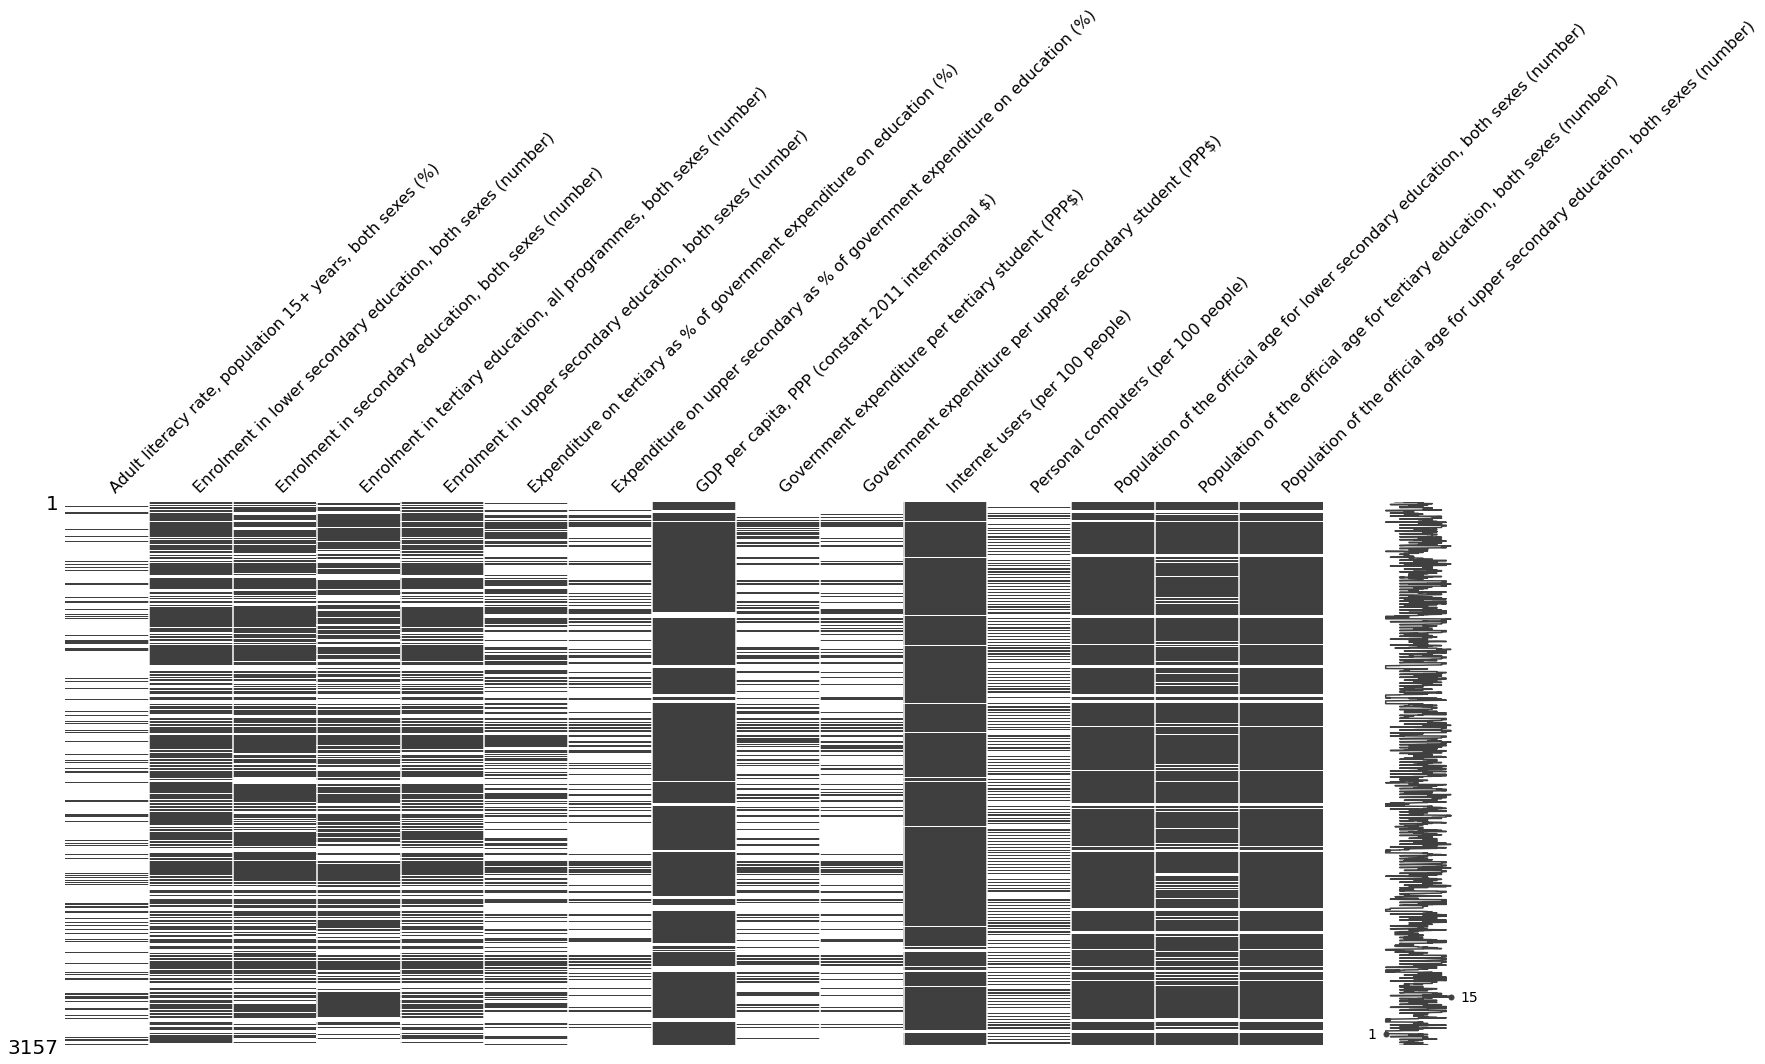

In [118]:
df_real_c.drop(index=nan_countries, level=1, inplace=True)
msno.matrix(df_real_c)
plt.show()

### V.2.3 Nettoyage par le taux de remplissage

On a vu que la table EdStatsData est "sparse": on va maintenant filtrer une deuxième fois en utilisant le taux de remplissage: des pays, et des indicateurs. Commençons par se donner une idée plus précise des divers taux de remplissage

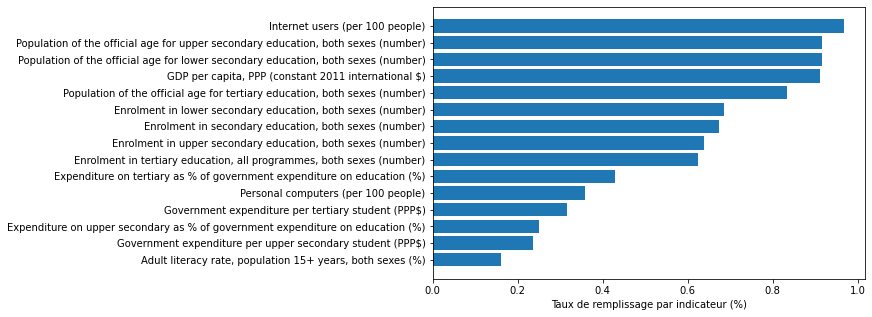

In [181]:
# taux de remplissage par indicateur
df = df_real_c.copy()
tr = df.notna().sum()/df.shape[0]
width = tr.sort_values()
y= width.index
plt.figure(figsize=(15, 5))
plt.barh(y=y, width=width)
plt.xlabel('Taux de remplissage par indicateur (%)')
plt.gcf().subplots_adjust(left=0.5)
plt.savefig('./livrables/images/tr_indicateurs.png')
plt.show()

Grande variabilité des taux de remplissage d'un indicateur à l'autre. Regardons maintenant les taux de remplissage par indicateur, et par pays.

In [138]:
# taux de remplissage par pays, par indicateur
taux_remplissage = df.notna().groupby(['Country Code', 'Country Name']).sum()/17
taux_remplissage.head()

,,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in lower secondary education, both sexes (number)","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Expenditure on tertiary as % of government expenditure on education (%),Expenditure on upper secondary as % of government expenditure on education (%),"GDP per capita, PPP (constant 2011 international $)",Government expenditure per tertiary student (PPP$),Government expenditure per upper secondary student (PPP$),Internet users (per 100 people),Personal computers (per 100 people),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)"
Country Code,Country Name,,,,,,,,,,,,,,,
AFG,Afghanistan,0.058824,0.764706,0.823529,0.294118,0.764706,0.352941,0.000000,0.882353,0.000000,0.000000,0.941176,0.117647,0.941176,0.941176,0.941176
AGO,Angola,0.117647,0.411765,0.411765,0.470588,0.529412,0.117647,0.058824,1.000000,0.000000,0.000000,1.000000,0.294118,1.000000,0.882353,1.000000
ALB,Albania,0.235294,0.882353,0.941176,0.941176,0.882353,0.058824,0.058824,1.000000,0.058824,0.058824,1.000000,0.529412,1.000000,0.941176,1.000000
AND,Andorra,0.117647,0.764706,0.823529,0.588235,0.764706,0.647059,0.411765,0.000000,0.000000,0.000000,0.941176,0.000000,0.000000,0.000000,0.000000
ARE,United Arab Emirates,0.058824,0.823529,0.000000,0.529412,0.823529,0.000000,0.000000,1.000000,0.000000,0.117647,1.000000,0.411765,0.941176,0.411765,0.941176


Affichons des exemples de taux de remplissage, pour trois indicateurs:
- Internet users
- Enrolment in tertiary education
- Adult literacy rate

Pour des raison de lisibilité, on n'affichera ces graphiques que pour un sous ensemble de pays sélectionnés aléatoirement.

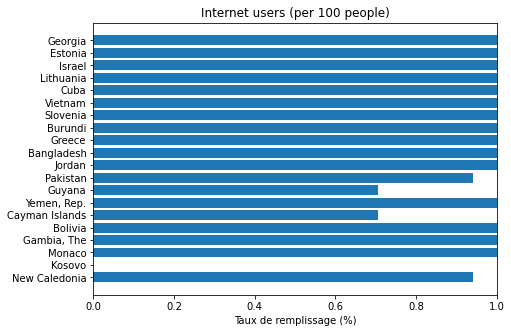

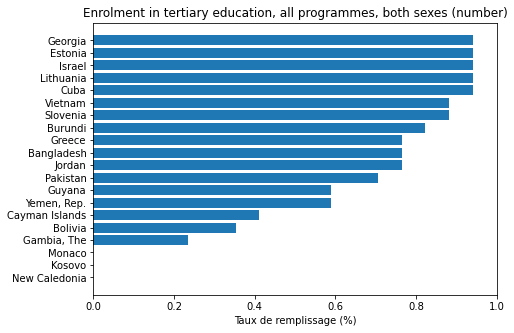

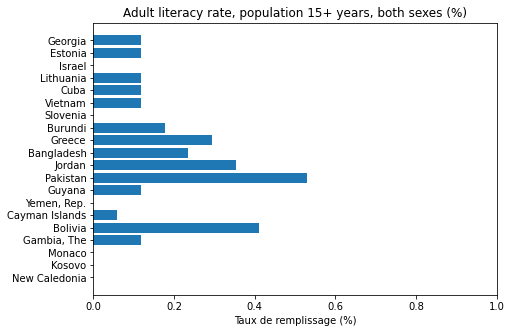

In [241]:
ind = ['Internet users (per 100 people)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Adult literacy rate, population 15+ years, both sexes (%)']

tr = taux_remplissage.copy()
tr = tr.reset_index(level=0, drop=True)

# On sélectionne aléatoirement 20 pays
index = tr.sample(20).index

#fig, axs = plt.subplots(1, len(ind), figsize=(15, 8), sharey=True)

y = tr.loc[index, ind[1]].sort_values().index

for i, c in enumerate(ind):
    plt.figure(figsize=(8, 5))
    width = tr.loc[y, c]
    plt.barh(y=y, width=width) 
    plt.title(c, fontsize=12)
    plt.xlabel('Taux de remplissage (%)')
    plt.xlim([0, 1])
    plt.gcf().subplots_adjust(left=0.2, right=0.9)
    plt.savefig('./livrables/images/'+c+'.png')
    plt.show()

Les taux de remplissage pour un pays donné sont assez variables d'un indicateur à l'autre. Regardons le taux de remplissage moyen par pays.

In [140]:
taux_remplissage['taux_moyen'] = taux_remplissage.mean(axis=1)
taux_remplissage['taux_moyen'].head()

Country Code  Country Name        
AFG           Afghanistan             0.521569
AGO           Angola                  0.486275
ALB           Albania                 0.639216
AND           Andorra                 0.337255
ARE           United Arab Emirates    0.470588
Name: taux_moyen, dtype: float64

**Y'a-t-il une corrélation entre le niveau économique du pays et/ou son emplacement géographique et le taux de remplissage?**

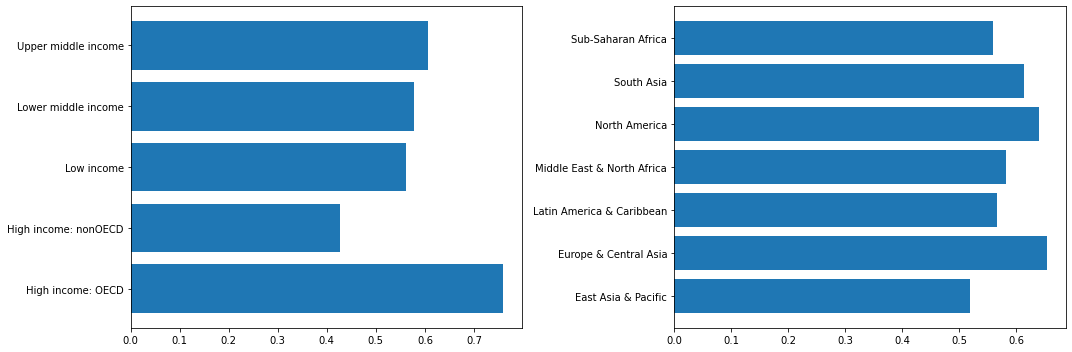

In [141]:
# On récupère l'income group et la région associés à chaque pays, et on ajoute ces infos à la table 
# taux_remplissage
Index = taux_remplissage.index.get_level_values(0).unique()
taux_remplissage['Income Group'] = df_countries[df_countries['Country Code'].isin(Index)]['Income Group'].values
taux_remplissage['Region'] = df_countries[df_countries['Country Code'].isin(Index)]['Region'].values

# Calcul des valeurs moyennes par niveau économique et région
tr_income = taux_remplissage.groupby('Income Group')['taux_moyen'].mean()
tr_region = taux_remplissage.groupby('Region')['taux_moyen'].mean()

# Affichage des résultats sous forme de diagrammes en bâtons
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].barh(y=tr_income.index, width=tr_income)
axs[1].barh(y=tr_region.index, width=tr_region)
fig.tight_layout()
plt.show()

Comme attendu, le taux de remplissage moyen est un peu supérieur dans le cas des pays riches appartenant à l'OCDE, mais c'est tout: pour les autres groups, comme pour les régions, les taux de remplissage sont assez similaires d'un groupe à l'autre.

Comme le taux de remplissage moyen est une valeur qui agrège les données de chaque année, puis de chaque indicateur, on ne peut pas savoir seulement grâce à cette mesure si il existe pour un indicateur donné une "bonne" année, c'est-à-dire une année pour laquelle le taux de remplissage est satisfaisant, même si par ailleurs beaucoup de valeurs, correspondants à d'autres années, sont manquantes. On peut donc regarder comment se répartissent les taux de remplissage par indicateur et par année.

On peut même aller plus loin , car on cherche le meilleur compromis entre taux de remplissage élevé et des données les plus récentes possible. On va donc regarder pour chaque pays la dernière année pour laquelle une donnée est renseignée, et on va ensuite compter le nombre de pays pour lesquels la dernière année correspond à l'année X, le nombre de pays dont la dernière valeur est donnée pour l'année Y etc. pour chaque indicateur. Cela nous permettra de définir une "année de référence" pour chaque indicateur: en effet, l'année de référence sera alors l'année pour laquelle le taux de remplissage est maximum.

In [142]:
# On ne va conserver que la dernière ligne non nulle pour chaque pays
countries = df_real_c.index.get_level_values(0).unique()
columns = df_real_c.columns
year_lastentry = np.empty((len(countries), len(columns)))
year_lastentry[:] = np.nan

for i, c in enumerate(countries):
    for j, col in enumerate(columns):
        try:
            year_lastentry[i, j] = df_real_c.loc(axis=0)[c, :, :][col].dropna().index.get_level_values(2)[-1]
        except:
            pass
            
year_lastentry = pd.DataFrame(year_lastentry, index=countries, columns=columns)
year_lastentry.head() #les années

,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in lower secondary education, both sexes (number)","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Expenditure on tertiary as % of government expenditure on education (%),Expenditure on upper secondary as % of government expenditure on education (%),"GDP per capita, PPP (constant 2011 international $)",Government expenditure per tertiary student (PPP$),Government expenditure per upper secondary student (PPP$),Internet users (per 100 people),Personal computers (per 100 people),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)"
Country Code,,,,,,,,,,,,,,,
AFG,2011.0,2014.0,2015.0,2014.0,2014.0,2015.0,NaN,2016.0,NaN,NaN,2016.0,2006.0,2015.0,2015.0,2015.0
AGO,2014.0,2011.0,2011.0,2015.0,2011.0,2006.0,2005.0,2016.0,NaN,NaN,2016.0,2006.0,2016.0,2015.0,2016.0
ALB,2012.0,2014.0,2015.0,2015.0,2014.0,2013.0,2013.0,2016.0,2013.0,2013.0,2016.0,2008.0,2016.0,2015.0,2016.0
AND,2016.0,2014.0,2015.0,2015.0,2014.0,2015.0,2014.0,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN
ARE,2005.0,2014.0,NaN,2015.0,2014.0,NaN,NaN,2016.0,NaN,2012.0,2016.0,2006.0,2015.0,2006.0,2015.0


In [143]:
# Regardons, par curiosité et pour l'exemple, ce qu'il en est de la France
year_lastentry.loc['FRA']

Adult literacy rate, population 15+ years, both sexes (%)                               NaN
Enrolment in lower secondary education, both sexes (number)                          2014.0
Enrolment in secondary education, both sexes (number)                                2014.0
Enrolment in tertiary education, all programmes, both sexes (number)                 2014.0
Enrolment in upper secondary education, both sexes (number)                          2014.0
Expenditure on tertiary as % of government expenditure on education (%)              2013.0
Expenditure on upper secondary as % of government expenditure on education (%)       2012.0
GDP per capita, PPP (constant 2011 international $)                                  2016.0
Government expenditure per tertiary student (PPP$)                                   2012.0
Government expenditure per upper secondary student (PPP$)                            2012.0
Internet users (per 100 people)                                                 

Affichons les résultats

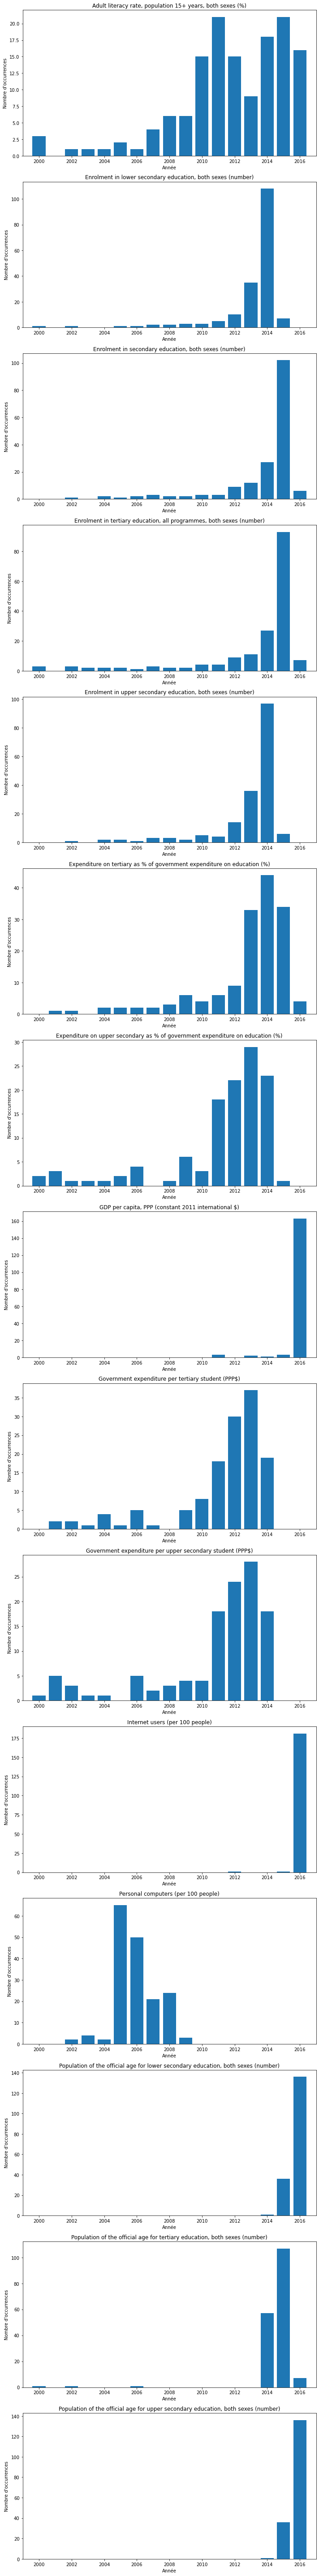

In [144]:
year_counts = {}
annee_ref = {}
cols = year_lastentry.columns
fig, axs = plt.subplots(len(cols), 1, figsize=(10, 80))

# Préparation des données
for i, c in enumerate(cols):
    years = year_lastentry.groupby(c)[c].value_counts().index.get_level_values(0).astype('int')
    year_counts[c] = year_lastentry.groupby(c)[c].count()
    # On stocke les années de référence dans le dictionnaire annee_ref qui sera utile pour la suite
    annee_ref[c] = int(year_lastentry[c].value_counts().idxmax()) # int() pour avoir les années au format entier et non  2011.0 par exemple

    axs[i].bar(x=years, height=year_counts[c])
    axs[i].set_title(c)
    axs[i].set_xlabel('Année')
    axs[i].set_ylabel('Nombre d\'occurrences')
    axs[i].set_xlim([1999, 2017])
fig.tight_layout()

Et les années de référence pour chaque indicateur:

In [145]:
annee_ref

{'Adult literacy rate, population 15+ years, both sexes (%)': 2015,
 'Enrolment in lower secondary education, both sexes (number)': 2014,
 'Enrolment in secondary education, both sexes (number)': 2015,
 'Enrolment in tertiary education, all programmes, both sexes (number)': 2015,
 'Enrolment in upper secondary education, both sexes (number)': 2014,
 'Expenditure on tertiary as % of government expenditure on education (%)': 2014,
 'Expenditure on upper secondary as % of government expenditure on education (%)': 2013,
 'GDP per capita, PPP (constant 2011 international $)': 2016,
 'Government expenditure per tertiary student (PPP$)': 2013,
 'Government expenditure per upper secondary student (PPP$)': 2013,
 'Internet users (per 100 people)': 2016,
 'Personal computers (per 100 people)': 2005,
 'Population of the official age for lower secondary education, both sexes (number)': 2016,
 'Population of the official age for tertiary education, both sexes (number)': 2015,
 'Population of the of

On peut remarquer deux choses:
- Les indicateurs sont inégalement répartis à travers les années
- Les indicateurs sont très inégalement renseignés: certains ont des valeurs pour l'année de référence sur quelques dizaines de pays (20-30), d'autres sur plus de cent.

Maintenant que nous avons sélectionné les valeurs pour chaque année de référence, pour chaque indicateur et chaque pays, on va regarder si les indicateurs choisis sont corrélés entre eux, avec peut-être une possibilité de filtrer les indicateurs qu'on souhaite conserver pour l'analyse finale

### V.2.4 Sélection d'indicateurs grâce à leurs corrélations

**Y'a-t-il des corrélation entre les indicateurs retenus?**
Cela permettrait d'éliminer certains indicateurs et rendre l'analyse plus lisible, et ne retenir que les meilleurs indicateurs dans chaque catégorie (Topic)

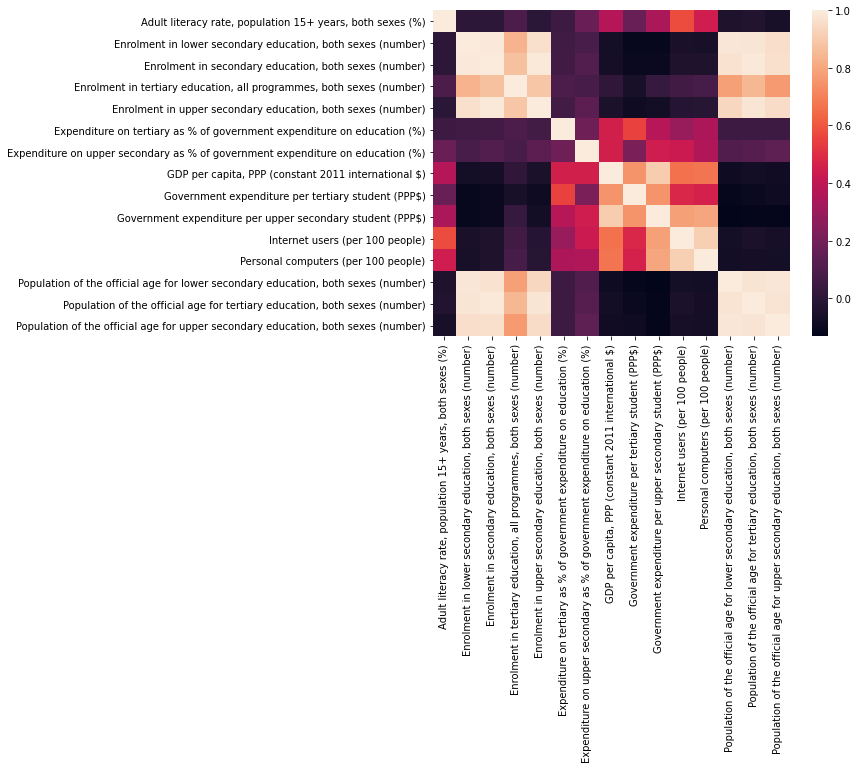

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_real_c.corr())
plt.show()

On voit qu'en effet, un certain nombre de ces indicateurs sont fortement corrélés. On va donc essayer de restreindre le plus possible le nombre d'indicateurs retenus, en utilisant ces taux de corrélation. Idéalement, on souhaiterait garder un indicateur/topic, voire deux si ils sont réellement complémentaires (non redondants). Le critère de sélection va reposer successivement sur le nombre de pays renseignés pour l'indicateur considéré et le taux de corrélation entre cet indicateurs et les autres: on souhaite en effet garder les indicateurs les mieux renseignés.

In [149]:
# Sélection des indicateurs

cols = df_real_c.columns
corr = {}
selected = []

# On commence par rassembler les indicateurs qu'on accompagne du nombre de pays représentés pour chacun d'entre eux
for i, c in enumerate(cols):
    n_pays = df_real_c.loc(axis=0)[:, :, annee_ref[c]][c].notna().sum()
    corr[c] = (c, n_pays) 
sorted_ind = sorted(corr, reverse=True)

# Pour chaque paire (indicateur, nb_pays), on sélectionne l'ensemble des indicateurs corrélés à plus de 90%
# et on choisit celui renseigné par le maximum de pays
for si in sorted_ind:
    # Sélection de l'ensemble des indicateurs corrélés à plus de 90%
    corr_series = df_real_c.corr()[si].sort_values(ascending=False)
    corr_series = corr_series[corr_series > 0.9]
    
    
    # Sélection de l'indicateur (parmi ceux corrélés à plus de 90%) renseigné par un maximum de pays
    ind_list = []
    for i in corr_series.index:
        try:
            ind_list.append(corr[i])
        except:
            pass    
    candidate = sorted(ind_list, key=lambda x: x[1], reverse=True)[0]
    
    # Ajout du candidat à la liste des candidats sélectionnés
    if candidate[0] not in selected:
        selected += [candidate[0]]

print(selected)

['Population of the official age for upper secondary education, both sexes (number)', 'Population of the official age for lower secondary education, both sexes (number)', 'Internet users (per 100 people)', 'GDP per capita, PPP (constant 2011 international $)', 'Government expenditure per tertiary student (PPP$)', 'Expenditure on upper secondary as % of government expenditure on education (%)', 'Expenditure on tertiary as % of government expenditure on education (%)', 'Enrolment in tertiary education, all programmes, both sexes (number)', 'Adult literacy rate, population 15+ years, both sexes (%)']


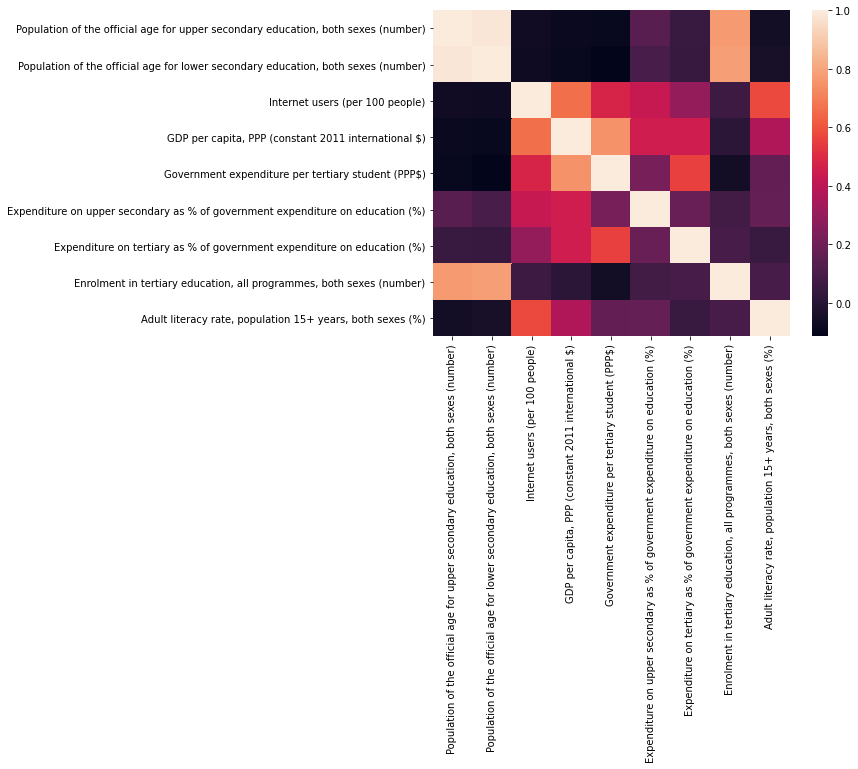

In [151]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_real_c[selected].corr())
plt.show()

On a réussit à se débarasser d'un certain nombre d'indicateurs. D'après la carte des corrélations, il reste néanmoins deux indicateurs très corrélés:
- Population of the official age for lower secondary education, both sexes (number)
- Population of the official age for upper secondary education, both sexes (number)

On décide de se débarasser du premier (de façon un peu arbitraire), car l'autre est plus proche de ce qu'on souhaite mesurer, et que les deux sont évalués sur le même nombre de pays par ailleurs

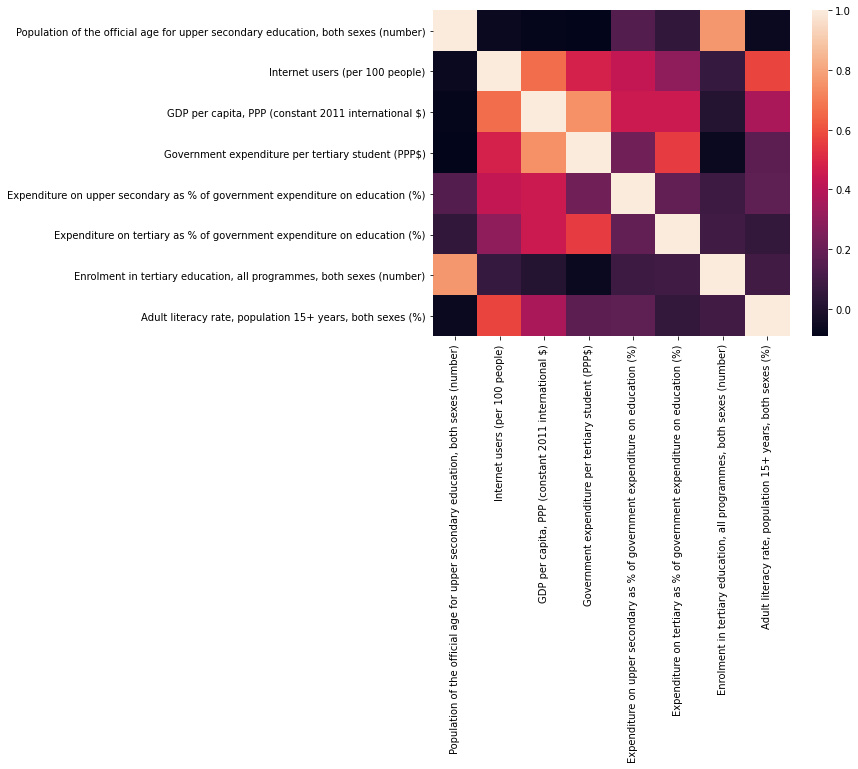

In [154]:
selected.remove('Population of the official age for lower secondary education, both sexes (number)')

plt.figure(figsize=(8, 6))
sns.heatmap(df_real_c[selected].corr())
plt.show()

L'indicateur Government expenditure per tertiary student (PPP) est redondant avec les deux autres indicateurs liés aux dépenses ('Expenditures'). Par ailleurs, il possède une corrélation assez élevée avec 'GDP per capita, PPP (constant 2011 international)':

In [155]:
df_real_c[selected].corr()['Government expenditure per tertiary student (PPP$)'].sort_values(ascending=False)

Government expenditure per tertiary student (PPP$)                                   1.000000
GDP per capita, PPP (constant 2011 international $)                                  0.749904
Expenditure on tertiary as % of government expenditure on education (%)              0.555572
Internet users (per 100 people)                                                      0.480685
Expenditure on upper secondary as % of government expenditure on education (%)       0.221960
Adult literacy rate, population 15+ years, both sexes (%)                            0.170266
Enrolment in tertiary education, all programmes, both sexes (number)                -0.061338
Population of the official age for upper secondary education, both sexes (number)   -0.092494
Name: Government expenditure per tertiary student (PPP$), dtype: float64

On  retire donc également 'Government expenditure...

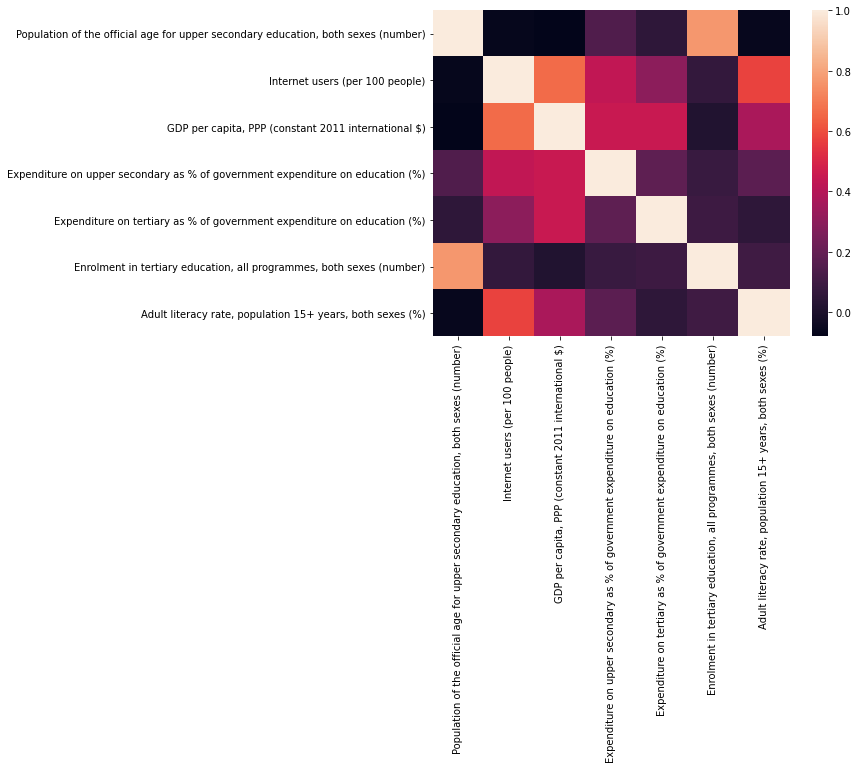

In [157]:
selected.remove('Government expenditure per tertiary student (PPP$)')
plt.figure(figsize=(8, 6))
sns.heatmap(df_real_c[selected].corr())
plt.show()

Il nous reste donc 7 indicateurs: 
- enrolment/population (2)
- expenditures (2)
- GDP (1)
- literacy (1)
- Internet (1)

# VI Visualisation et analyse de données

## VI.1 Statistiques sur les pays

Commençons par regarder les distributions statistiques de chaque indicateur retenu sur les pays

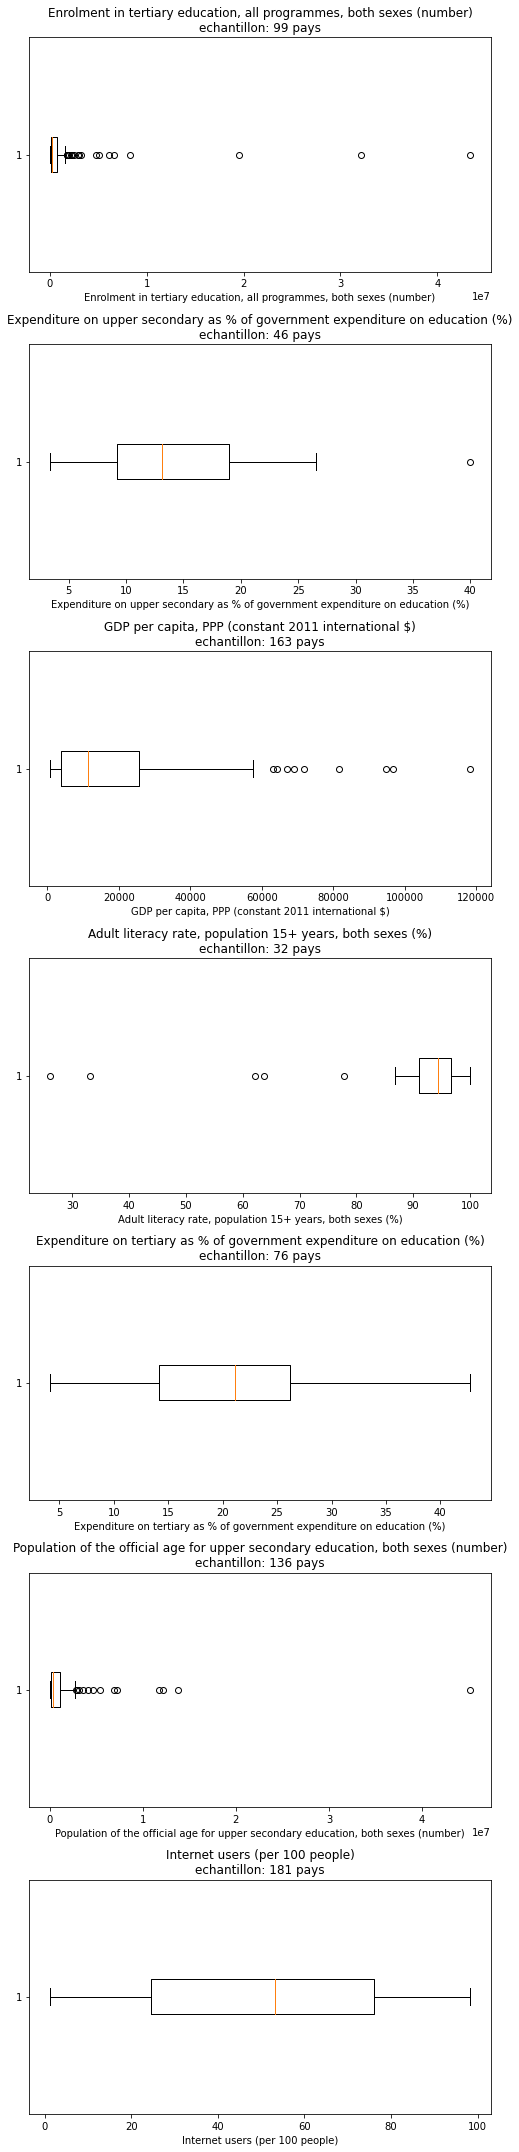

In [147]:
cols = selected
df = df_real_c.copy()
#df = df.reset_index(level=1, drop=True)
fig, axs = plt.subplots(len(cols), 1, figsize=(7, 30))

for i, c in enumerate(cols):
    label = c.split(' ')[-1]
    
    # l'echantillon de la distribution. Attention, il s'agit des valeurs pour l'année de référence, mais 
    # l'échantillon comprend également les pays pour lesquels la dernière valeur renseignée peut être plus tardive
    # Ceci explique que les échantillons sont en général plus grand que le nombre de valeurs indiquées dans les
    # diagrammes en bâton ci-dessus.
    nb_pays = df.loc(axis=0)[:,:, annee_ref[c]][c].notna().sum() 
    
    axs[i].boxplot(df.loc(axis=0)[:,:, annee_ref[c]][c].dropna(),
                   vert=False,
                   #labels=label,
                  )
    
    axs[i].set_title(c+'\nechantillon: {} pays'.format(nb_pays))
    axs[i].set_xlabel(c)
fig.tight_layout()    
plt.show()

On peut regarder:
- la répartition des différentes régions du monde dans chaque indicateur
- la répartition des différents groupes de revenus dans chaque indicateur
- les corrélations entre indicateurs

Enfin, on déterminera un score d'attractivité pour les pays en vue d'un développement commercial

## VI.2 Statistiques sur les pays et regions

On cherche ici à visualiser les distributions des mêmes indicateurs, mais cette fois en regardant au niveau des blocs:
- blocs "économiques", définis par le niveau de revenu des pays
- blocs "géographiques", ou régionaux

Cela permettra de se donner une idée de la dispersion des indicateurs retenus entre chacun de ces blocs.

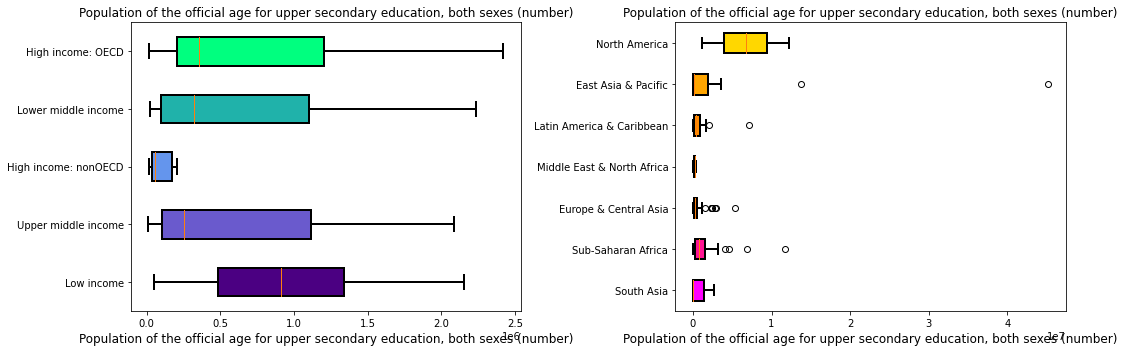

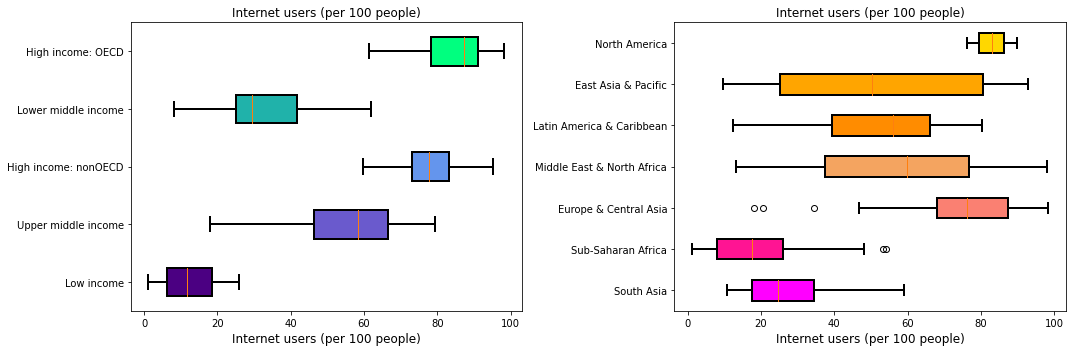

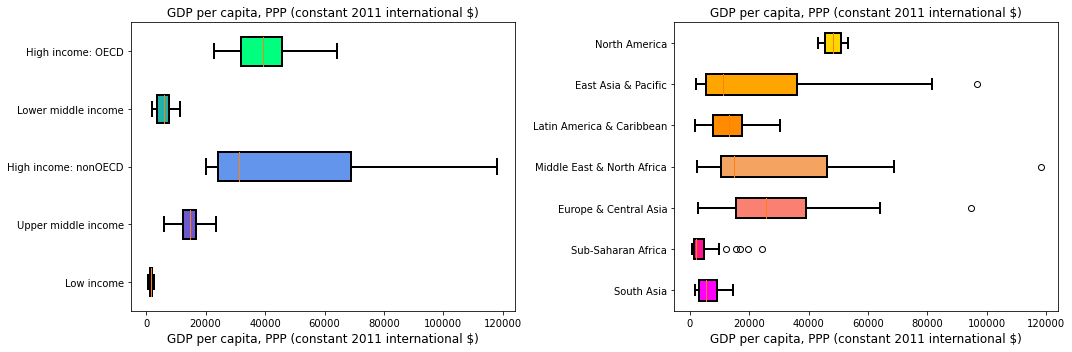

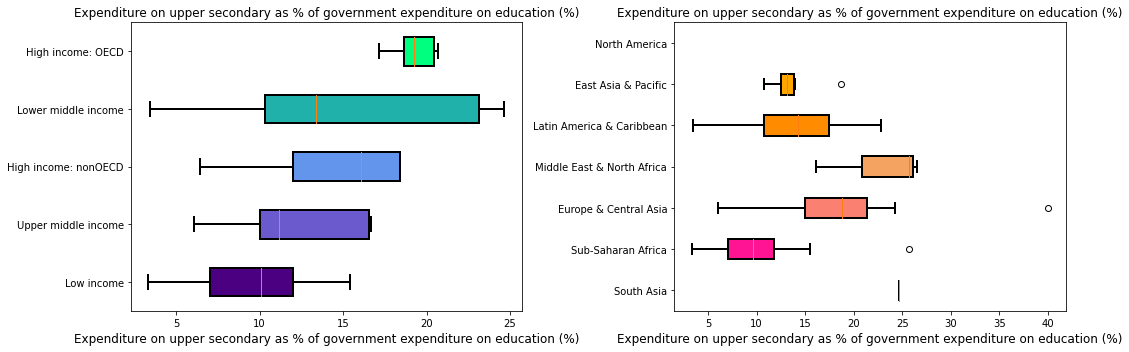

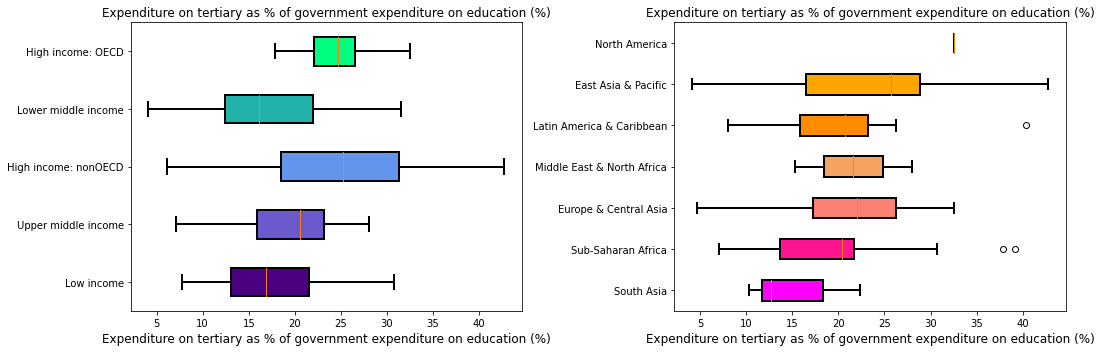

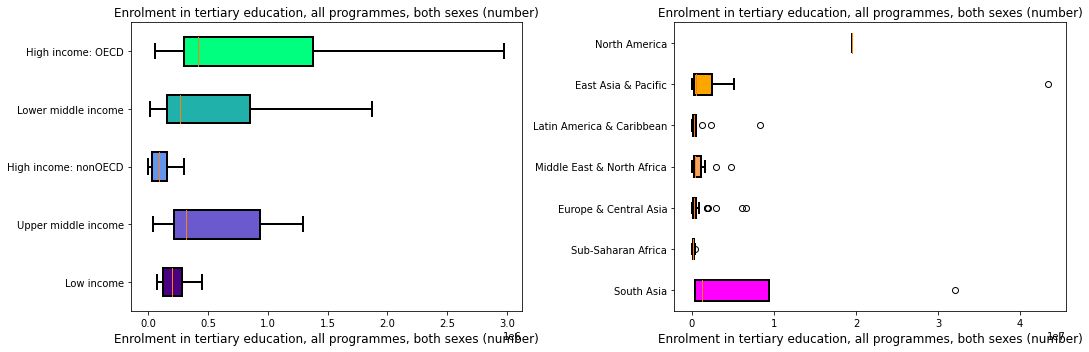

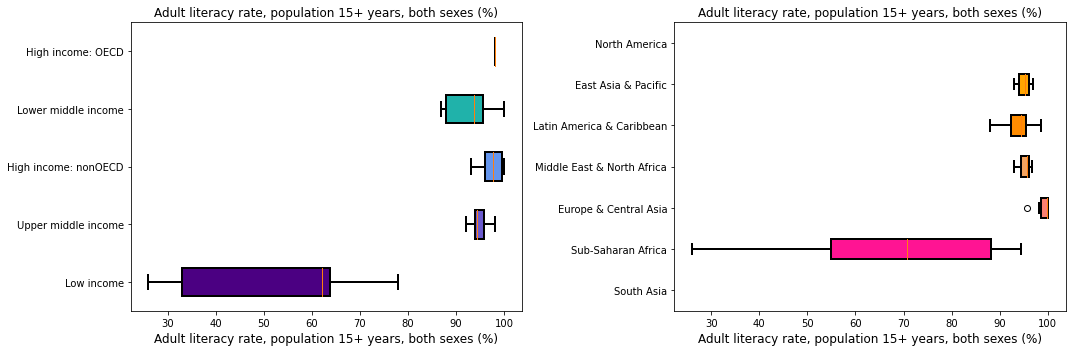

In [158]:
# 1. On commence par créer un nouveau dataframe ne contenant que les données aux années de référence
Index = df_real_c.index.get_level_values(0).unique()
cols = selected
data = np.empty([len(Index), len(cols)])
data[:] = np.nan

for j,c in enumerate(cols):
    for i, ct in enumerate(Index):
        cname = df_real_c.loc[ct].index.get_level_values(0).unique().values[0]
        annee_ref = int(year_lastentry[c].value_counts().idxmax())
        try:
            data[i,j] = df_real_c.loc(axis=0)[ct, cname, annee_ref][c]
        except:
            pass
df = pd.DataFrame(data, index=Index, columns=cols)


# 2. On ajoute les colonnes 'Income Group' et 'Region'
Index = df.index.get_level_values(0).unique()
df['Income Group'] = df_countries[df_countries['Country Code'].isin(Index)]['Income Group'].values
df['Region'] = df_countries[df_countries['Country Code'].isin(Index)]['Region'].values

# 3. On crée les listes income_groups et region_groups
income_groups = df['Income Group'].unique()
region_groups = df['Region'].unique()

# 4. On trace les distributions: sur les income_groups et les régions
boxprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)
flierprops = dict(linewidth=2)
igcolors = ['indigo', 'slateblue', 'cornflowerblue', 'lightseagreen', 'springgreen']
rgcolors = ['magenta', 'deeppink', 'salmon', 'sandybrown', 'darkorange', 'orange', 'gold']
colors = [igcolors, rgcolors]

for k, c in enumerate(df.columns[:-2]):
    iggroupes = []
    rggroupes = []
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    bplots = []
    
    for ig in income_groups:
        iggroupes.append(df[df['Income Group']==ig][c].dropna())
       
    for rg in region_groups:
        rggroupes.append(df[df['Region']==rg][c].dropna())
        
    bplots.append(axs[0].boxplot([ig for ig in iggroupes], 
                                labels=income_groups, 
                                vert=False, 
                                patch_artist = True, 
                                showfliers=False,
                                boxprops=boxprops,
                                whiskerprops=whiskerprops, 
                                capprops=capprops))
    axs[0].set_xlabel(c, fontsize=12)
    axs[0].set_title(c)
    
    bplots.append(axs[1].boxplot([rg for rg in rggroupes], 
                                labels=region_groups, 
                                vert=False, 
                                patch_artist = True, 
                                showfliers=True,
                                boxprops=boxprops,
                                whiskerprops=whiskerprops, 
                                capprops=capprops))
    axs[1].set_xlabel(c, fontsize=12)
    axs[1].set_title(c)
    
    for i, bplot in enumerate(bplots):
        for patch, color in zip(bplot['boxes'], colors[i]):
            patch.set_facecolor(color)
    
    fig.tight_layout()
    plt.show()

## VI.3 Scoring

Pour réaliser un scoring et ainsi déterminer les meilleurs candidats pour un développement commercial, on va procéder de la façon suivante:
- on commence par normaliser les valeurs pour chaque indicateurs. Deux méthodes de normalisation sont utilisées: une méthode 'gaussienne', qui consiste à rescaler toutes les valeurs de façon à ce qu'elles se distribuent selon une loi normale centrée réduite, et une méthode minmax.
- On somme, pour chaque pays, toutes les valeurs (une valeur/indicateur). Dans la mesure où pour tous les indicateurs choisis on suppose que "le plus, ces le mieux", les meilleurs pays seront ceux dont le score sera le plus élevé.

En vue du scoring, on va commencer par remplacer tous les NaN par les valeurs correspondant à la valeur moyenne, pour l'indicateur et la région/Income Group auquel appartient le pays concerné. 

On commence par calculer ces valeurs moyennes et les ranger dans deux dataframes:

In [252]:
# Pour remplir les valeurs manquantes
# Les valeurs moyennes de chaque indicateur pour chaque Income Group
vmoy_ig = df.groupby('Income Group').mean()
# Les valeurs moyennes de chaque indicateur pour chaque région
vmoy_rg = df.groupby('Region').mean()

On crée les nouveaux DataFrame, dont les valeurs manquantes sont remplies comme indiqué ci-dessus

In [278]:
filledval_ig = df.copy()

for c in filledval_ig.columns[:-2]:
    for ind in filledval_ig.index:
        if np.isnan(filledval_ig.loc[ind, c]):
            filledval_ig.loc[ind, c] = vmoy_ig.loc[df_countries.loc[df_countries['Country Code']==ind, 'Income Group'].unique()[0]][c]

In [254]:
filledval_rg = df.copy()
for c in filledval_rg.columns[:-2]:
    for ind in filledval_rg.index:
        if np.isnan(filledval_rg.loc[ind, c]):
            try:
                filledval_rg.loc[ind, c] = vmoy_rg.loc[df_countries.loc[df_countries['Country Code']==ind, 'Region'].unique()[0]][c]
            except:
                pass

In [255]:
df.head()

,"Population of the official age for upper secondary education, both sexes (number)","GDP per capita, PPP (constant 2011 international $)",Expenditure on upper secondary as % of government expenditure on education (%),Internet users (per 100 people),"Adult literacy rate, population 15+ years, both sexes (%)",Expenditure on tertiary as % of government expenditure on education (%),"Enrolment in tertiary education, all programmes, both sexes (number)",Income Group,Region
Country Code,,,,,,,,,
AFG,NaN,1739.583177,NaN,10.595726,NaN,12.41128,NaN,Low income,South Asia
AGO,1736603.0,5984.640422,NaN,13.000000,NaN,NaN,221037.0,Upper middle income,Sub-Saharan Africa
ALB,149745.0,11359.099157,6.04230,66.363445,NaN,NaN,160527.0,Upper middle income,Europe & Central Asia
AND,NaN,NaN,6.44078,97.930637,100.0,6.07554,501.0,High income: nonOECD,Europe & Central Asia
ARE,NaN,67133.065519,NaN,90.600007,NaN,NaN,156613.0,High income: nonOECD,Middle East & North Africa


In [261]:
filledval_ig.head()

,"Population of the official age for upper secondary education, both sexes (number)","GDP per capita, PPP (constant 2011 international $)",Expenditure on upper secondary as % of government expenditure on education (%),Internet users (per 100 people),"Adult literacy rate, population 15+ years, both sexes (%)",Expenditure on tertiary as % of government expenditure on education (%),"Enrolment in tertiary education, all programmes, both sexes (number)",Income Group,Region
Country Code,,,,,,,,,
AFG,1.342092e+06,1739.583177,10.552183,10.595726,52.569654,12.411280,239333.5,Low income,South Asia
AGO,1.736603e+06,5984.640422,13.842964,13.000000,94.946256,21.042466,221037.0,Upper middle income,Sub-Saharan Africa
ALB,1.497450e+05,11359.099157,6.042300,66.363445,94.946256,21.042466,160527.0,Upper middle income,Europe & Central Asia
AND,2.806221e+05,48981.227095,6.440780,97.930637,100.000000,6.075540,501.0,High income: nonOECD,Europe & Central Asia
ARE,2.806221e+05,67133.065519,18.581196,90.600007,97.345570,24.804282,156613.0,High income: nonOECD,Middle East & North Africa


In [262]:
filledval_rg.head()

,"Population of the official age for upper secondary education, both sexes (number)","GDP per capita, PPP (constant 2011 international $)",Expenditure on upper secondary as % of government expenditure on education (%),Internet users (per 100 people),"Adult literacy rate, population 15+ years, both sexes (%)",Expenditure on tertiary as % of government expenditure on education (%),"Enrolment in tertiary education, all programmes, both sexes (number)",Income Group,Region
Country Code,,,,,,,,,
AFG,9.135687e+05,1739.583177,24.657471,10.595726,NaN,12.411280,8683079.75,Low income,South Asia
AGO,1.736603e+06,5984.640422,10.337625,13.000000,67.089260,20.021201,221037.00,Upper middle income,Sub-Saharan Africa
ALB,1.497450e+05,11359.099157,6.042300,66.363445,98.919428,21.136806,160527.00,Upper middle income,Europe & Central Asia
AND,7.055694e+05,28201.809502,6.440780,97.930637,100.000000,6.075540,501.00,High income: nonOECD,Europe & Central Asia
ARE,2.171565e+05,67133.065519,22.775194,90.600007,95.138263,21.629255,156613.00,High income: nonOECD,Middle East & North Africa


In [266]:
# Le scoring se fait sur les DataFrames filled_ig ou filled_rg
def scoring(df=filledval_ig, scoring_method='stdscaler'):
    '''Docstring: Renvoie un DataFrame avec les données normalisées selon au choix:
    - normalisation gaussienne 'stdscaler'
    - normalisation minmax 'minmax'
    
    Paramètres:
    df: pandas.DataFrame=filledval_ig
    scoring_method: str='stdscaler'
    '''
    codes_index = df.index.get_level_values(0).unique()
    names_index = df_countries.loc[df_countries['Country Code'].isin(codes_index), 'Short Name']
    
    scoring = {}
    
    for c in df.columns[:-2]:
        mean = df[c].mean()
        std = df[c].std()
        Min = df[c].min()
        Max = df[c].max()
        if scoring_method == 'stdscaler':
            scoring[c] = df[c].apply(lambda x: (x-mean)/std)
        elif scoring_method == 'minmax':
            scoring[c] = df[c].apply(lambda x: ((x-Min)/(Max-Min)))
    
    # Creation du DataFrame                                 
    scoring = pd.DataFrame(scoring, columns=df_real_c.columns)
    
    # L'index Country Code est remplacé par Country Name
    scoring = scoring.reset_index()
    scoring['Country Name'] = scoring['Country Code'].apply(lambda x: df_countries[df_countries['Country Code']==x]['Short Name'].unique()[0])
    scoring = scoring.set_index('Country Name').drop(columns='Country Code')
                                     
    return scoring


scoring_MinMax = scoring(scoring_method='minmax')
scoring_std = scoring()

### 1. Methode stdscaler, Income Group

In [267]:
# scoring avec valeurs manquantes récupérées par l'Income Group
scoring_std.sum(axis=1).sort_values(ascending=False)[:20]

Country Name
China                   21.631333
United States           13.249609
Monaco                   9.233834
Macao SAR, China         9.083083
Qatar                    7.491451
United Kingdom           6.150963
Brunei                   5.796750
Germany                  5.703627
India                    5.463737
Singapore                5.384274
Netherlands              5.350802
Iran                     5.268919
Austria                  5.262911
Norway                   5.238036
Switzerland              5.088184
Hong Kong SAR, China     5.043472
Luxembourg               5.005186
United Arab Emirates     4.980655
Korea                    4.864758
Iceland                  4.689833
dtype: float64

### 2. MinMax, Income Group

In [270]:
# scoring avec valeurs manquantes récupérées par l'Income Group
scoring_MinMax.sum(axis=1).sort_values(ascending=False)[:20]

Country Name
China                   4.309695
United States           4.096367
Macao SAR, China        4.025764
Monaco                  3.898587
Qatar                   3.881832
Norway                  3.477793
Luxembourg              3.474617
Brunei                  3.466722
United Kingdom          3.466634
Singapore               3.437230
Netherlands             3.426246
United Arab Emirates    3.412319
Germany                 3.405548
Switzerland             3.401940
Hong Kong SAR, China    3.385223
Austria                 3.384486
Iceland                 3.357865
Bahrain                 3.331438
Denmark                 3.320926
Faeroe Islands          3.313480
dtype: float64

### 3. Stdscaler, Region

In [272]:
scoring_std = scoring(df=filledval_rg)
scoring_std.sum(axis=1).sort_values(ascending=False)[:20]

Country Name
China                   21.045705
United States           11.481032
Canada                   8.525551
Macao SAR, China         8.345190
Qatar                    7.769607
Monaco                   6.912147
Singapore                6.159636
United Kingdom           5.685690
India                    5.593407
Germany                  5.451030
Netherlands              5.446948
Austria                  5.359286
United Arab Emirates     5.068901
Switzerland              4.941860
Kuwait                   4.932808
Brunei                   4.859995
Luxembourg               4.613489
Norway                   4.550004
Japan                    4.483765
Finland                  4.209988
dtype: float64

### 4. MinMax, Region

In [274]:
scoring_MinMax = scoring(df=filledval_rg, scoring_method='minmax')
scoring_MinMax.sum(axis=1).sort_values(ascending=False)[:20]

Country Name
China                   4.373480
Qatar                   3.882856
Macao SAR, China        3.859949
Monaco                  3.662636
United Kingdom          3.453653
Singapore               3.442543
Netherlands             3.436735
Luxembourg              3.430913
United Arab Emirates    3.413343
Austria                 3.394975
Germany                 3.385315
Switzerland             3.381707
Norway                  3.380630
Kuwait                  3.327228
Brunei                  3.300907
Finland                 3.247994
Sweden                  3.247705
Iceland                 3.237232
Denmark                 3.223763
Hong Kong SAR, China    3.219408
dtype: float64

Selon la méthode choisie, les meilleurs pays ne seront pas tout à fait les mêmes. Certains pays se trouvent dans la liste quelque soit les indicateurs et la méthode retenus, ces pays seront sans doute de bons candidats. On peut aussi penser à d'autres indicateurs, d'autres mesures de scoring (prise en compte de l'évolution des indicateurs par exemple) et sélectionner via des méthodes non retenues ici, comme par exemple l'emplacement géographique du pays, le contexte politique et social, ainsi que la langue parlée (la Chine apparaît comme un bon candidat, mais sans doute moins facile de s'y développer que dans un pays où l'on parle l'anglais ou le français par exemple, et le contexte politique peut également jouer négativement).

# --------- FIN ----------------------

## Notes

## VI.2 Regions

In [25]:
selectedData_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 9 to 1141
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      338 non-null    object 
 1   Country Code      338 non-null    object 
 2   Indicator Name    338 non-null    object 
 3   Indicator Code    338 non-null    object 
 4   2000              329 non-null    float64
 5   2001              330 non-null    float64
 6   2002              330 non-null    float64
 7   2003              329 non-null    float64
 8   2004              329 non-null    float64
 9   2005              329 non-null    float64
 10  2006              329 non-null    float64
 11  2007              330 non-null    float64
 12  2008              329 non-null    float64
 13  2009              328 non-null    float64
 14  2010              328 non-null    float64
 15  2011              327 non-null    float64
 16  2012              329 non-null    float64
 

<AxesSubplot:>

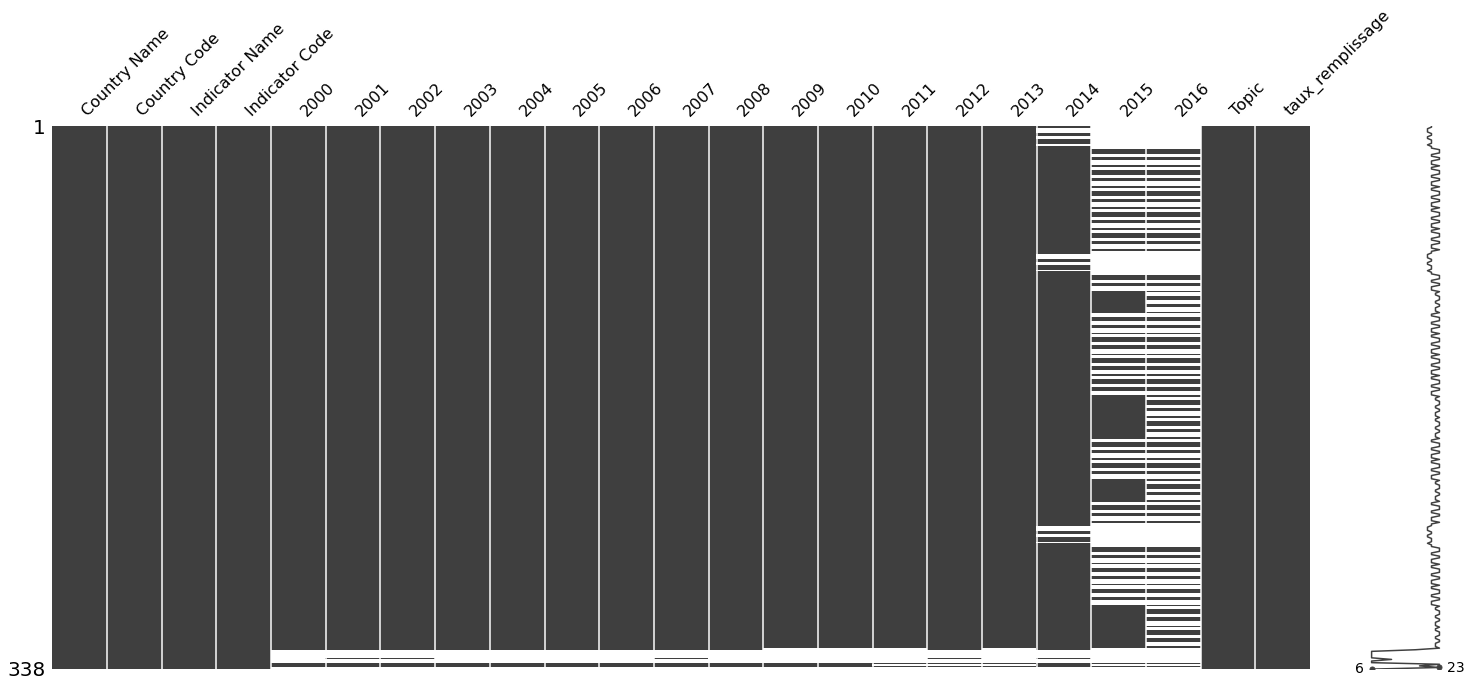

In [26]:
msno.matrix(selectedData_regions)

In [27]:
selectedData_regions[selectedData_regions['2000'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,Topic,taux_remplissage
1111,Nauru,NRU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tertiary,0.000000
1120,Nauru,NRU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economic Policy & Debt: National accounts: US$...,0.000000
1121,Nauru,NRU,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economic Policy & Debt: National accounts: US$...,0.000000
1122,Nauru,NRU,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economic Policy & Debt: Purchasing power parity,0.000000
1130,Nauru,NRU,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tertiary,0.000000
1131,Nauru,NRU,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,8.77598,8.59951,NaN,NaN,NaN,...,NaN,NaN,NaN,69.97245,NaN,94.147583,NaN,NaN,Secondary,0.294118
1133,Nauru,NRU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Infrastructure: Communications,0.000000
1137,Nauru,NRU,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health: Population: Dynamics,0.000000
1141,Nauru,NRU,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health: Population: Structure,0.000000


<AxesSubplot:>

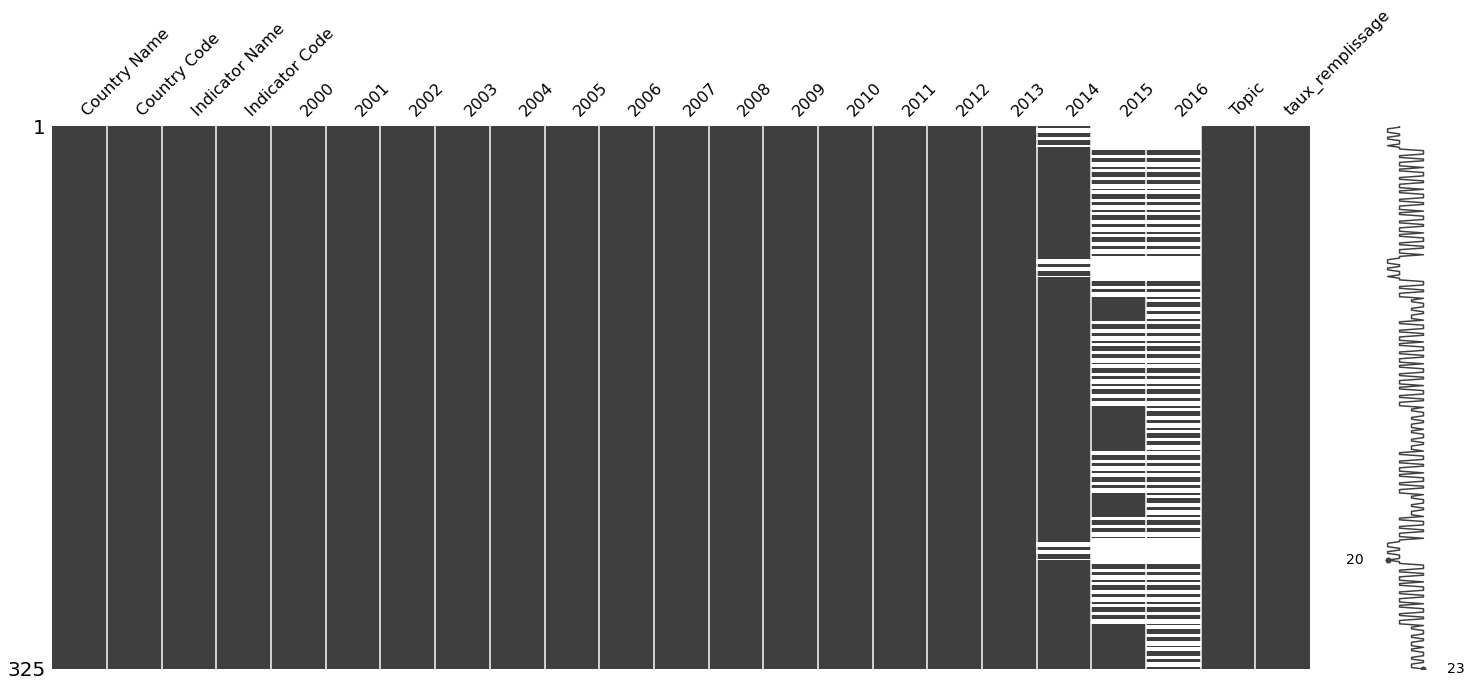

In [28]:
# Retirons Nauru de la liste.
selectedData_regions = selectedData_regions[selectedData_regions['Country Name']!='Nauru']
msno.matrix(selectedData_regions)

On va partager le jeu de données en deux: d'un côté les "vraies" régions (North America, Asia etc.), et d'un autre côté les régions décrites par leur "Income Group".

In [29]:
income_groups = ['High income', 'Low income', 'Lower middle income', 'Low & middle income',
                'Middle income', 'Upper middle income', 'Heavily indebted poor countries (HIPC)',
                'Least developed countries: UN classification']

In [30]:
geo_regions = list(df_country[~df_country['Short Name'].isin(income_groups+['OECD members']) & df_country['Currency Unit'].isna()]['Short Name'])
inc_regions = income_groups

----------------------------------------
GDP per capita, PPP (constant 2011 international $)
Maximum: 52306.8 (North America)
Moyenne: 27832.0
Minimum: 5620.6 (South Asia)
Ecart-type: 21335.7
----------------------------------------
Internet users (per 100 people)
Maximum: 80.4 (Euro area)
Moyenne: 57.6
Minimum: 26.5 (South Asia)
Ecart-type: 25.9
----------------------------------------
Population growth (annual %)
Maximum: 1.3 (South Asia)
Moyenne: 0.9
Minimum: 0.4 (Euro area)
Ecart-type: 0.4
----------------------------------------
Population, total
Maximum: 7442135578.0 (World)
Moyenne: 2477223225.8
Minimum: 340894606.0 (Euro area)
Ecart-type: 3376605163.5


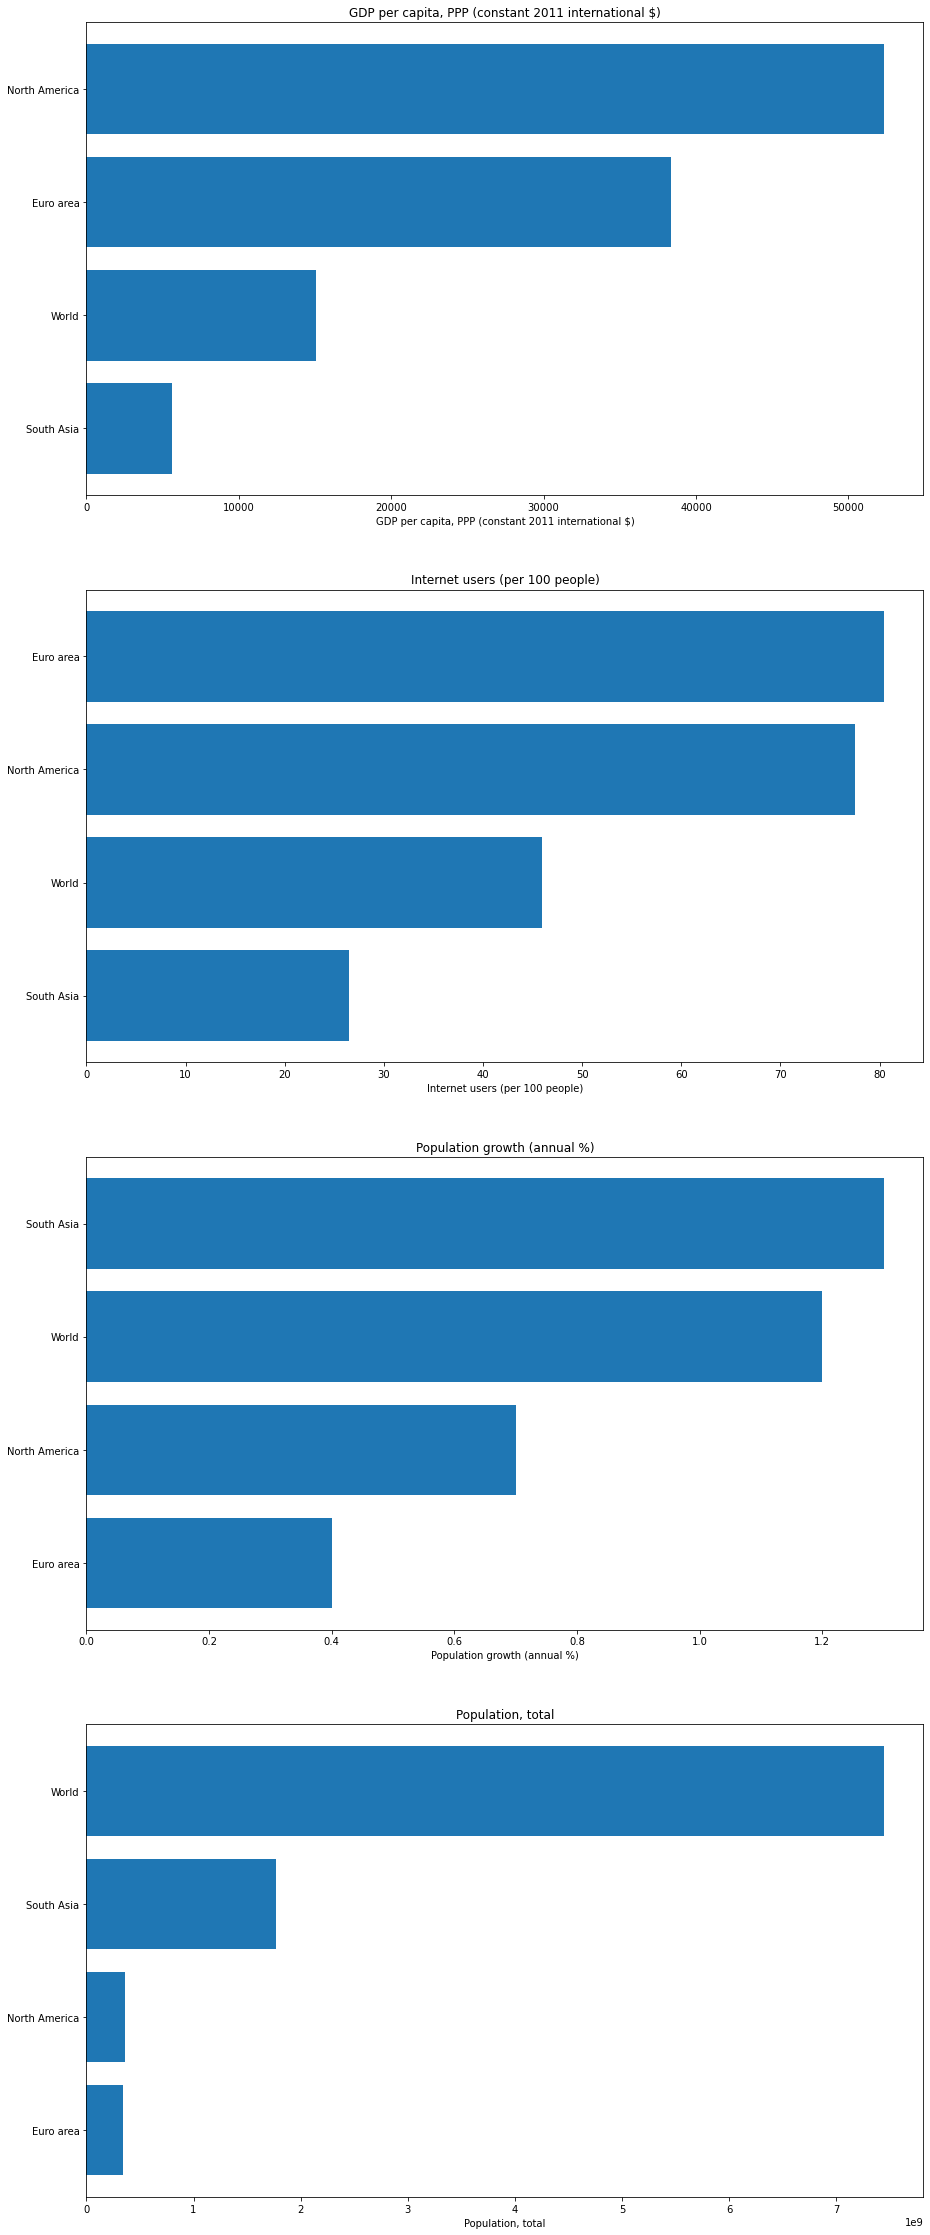

In [31]:
fig, axs = plt.subplots(len(final_indicators_regions), 1, figsize=(15, 40))
df1 = selectedData_regions[selectedData_regions['Country Name'].isin(geo_regions)]
df2 = selectedData_regions[selectedData_regions['Country Name'].isin(inc_regions)]

for i, fi in enumerate(final_indicators_regions):
    df = select_indicator(df1, fi).dropna(subset=na_cols, how='any')
    df = df[['Country Name', '2016']].sort_values(by='2016', ascending=False)
    df['2016'] = df['2016'].apply(lambda x: round(x, ndigits=1))
    
    print('-'*40)
    print(fi)
    print('Maximum: {} ({})'.format(df['2016'].max(), df[df['2016']==df['2016'].max()].iloc[0, 0]))
    print('Moyenne: {:.1f}'.format(df['2016'].mean()))
    print('Minimum: {} ({})'.format(df['2016'].min(), df[df['2016']==df['2016'].min()].iloc[0, 0]))
    print('Ecart-type: {:.1f}'.format(df['2016'].std()))
    
    
    y_pos = np.arange(len(df['2016']))
    values = df['2016'].to_numpy()
    
    axs[i].barh(y_pos, values, align='center')
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(df['Country Name'])
    axs[i].invert_yaxis()  # labels read top-to-bottom
    axs[i].set_xlabel(fi)
    axs[i].set_title(fi)
    
    # Label with specially formatted floats
    #axs[i].set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

# Données prospectives

In [32]:
# rappel
prospect_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51436 entries, 91309 to 886921
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    51436 non-null  object 
 1   Country Code    51436 non-null  object 
 2   Indicator Name  51436 non-null  object 
 3   Indicator Code  51436 non-null  object 
 4   2020            51436 non-null  float64
 5   2025            51436 non-null  float64
 6   2030            51436 non-null  float64
 7   2035            51436 non-null  float64
 8   2040            51436 non-null  float64
 9   2045            51436 non-null  float64
 10  2050            51436 non-null  float64
 11  2055            51436 non-null  float64
 12  2060            51436 non-null  float64
 13  2065            51436 non-null  float64
 14  2070            51436 non-null  float64
 15  2075            51436 non-null  float64
 16  2080            51436 non-null  float64
 17  2085            51436 non-

In [33]:
prospect_data['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

**Sélection des séries intéressantes**

In [34]:
# D'abord, seules les données sur la population totale nous intéressent
witt_ind = [w for w in prospect_data['Indicator Name'].unique() if w.count('Total') > 0]

# Puis on ne garde que les données relatives aux nivueax scolaires "lower secondary" et "upper secondary"
witt_ind_ = witt_ind
witt_ind = [w for w in witt_ind_ if w.count('Lower Secondary') > 0 or w.count('Upper Secondary') > 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


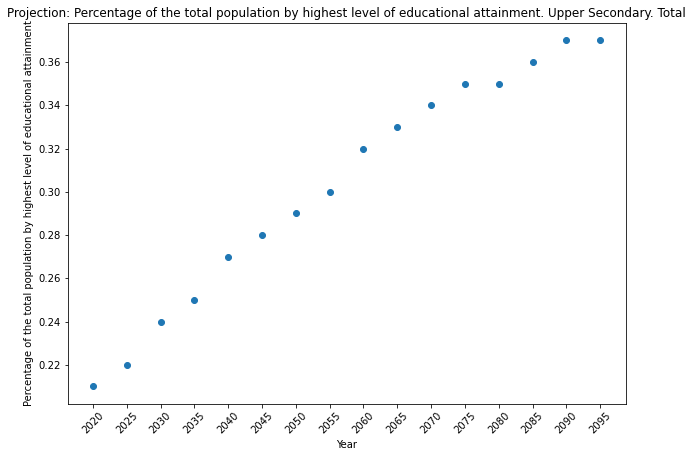

In [35]:
# Essai sur l'indicateur 'Wittgenstein Projection: Percentage of the total population by highest level of
# educational attainment. Upper Secondary. Total'
prosp_pop_upper = select_indicator(prospect_data, 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total')

fig, axs = plt.subplots(figsize=(10, 7))    
    
y_pos = prosp_pop_upper.columns[4:-1]
values = prosp_pop_upper[prosp_pop_upper['Country Name']=='World'][y_pos].to_numpy()

   
axs.scatter(y_pos, values)
axs.set_ylabel('Percentage of the total population by highest level of educational attainment')
axs.set_xlabel('Year')
labels = y_pos
axs.set_xticklabels(labels, rotation=45)
axs.set_title('Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total')

plt.show()